In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
# import plotly.graph_objs as go
# import plotly.express as px
#from plotly.offline import init_notebook_mode,iplot
#init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
#plt.rcParams["patch.force_edgecolor"] = True
#plt.style.use('fivethirtyeight')
#mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
df_initial=pd.read_csv('D:\PyProjects\jupyterWorkSpace\数据分析与简单挖掘练习\客户细分模型\客户细分模型\data.csv')



In [3]:
df_initial.shape

(284709, 8)

In [4]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284709 entries, 0 to 284708
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284709 non-null  object 
 1   StockCode    284709 non-null  object 
 2   Description  284207 non-null  object 
 3   Quantity     284709 non-null  int64  
 4   InvoiceDate  284709 non-null  object 
 5   UnitPrice    284709 non-null  float64
 6   CustomerID   223352 non-null  float64
 7   Country      284709 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 17.4+ MB


In [5]:
df_initial.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS,6,07/08/2011 16:11,1.63,NaN,United Kingdom
1,559518,22055,MINI CAKE STAND HANGING STRAWBERY,1,07/08/2011 16:11,3.29,NaN,United Kingdom
2,559518,22179,SET 10 NIGHT OWL LIGHTS,1,07/08/2011 16:11,13.29,NaN,United Kingdom
3,559518,22297,HEART IVORY TRELLIS SMALL,1,07/08/2011 16:11,2.46,NaN,United Kingdom
4,559518,22352,LUNCH BOX WITH CUTLERY RETROSPOT,1,07/08/2011 16:11,4.96,NaN,United Kingdom


In [6]:
df_initial.isnull().values.any()

True

# 探索性数据分析

## 缺失值处理

In [7]:
df_initial.isnull().sum(axis=0)

InvoiceNo          0
StockCode          0
Description      502
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     61357
Country            0
dtype: int64

In [8]:
df_initial.isnull().sum(axis=0)/df_initial.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.001763
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.215508
Country        0.000000
dtype: float64

In [9]:
df_initial.dropna(axis=0, subset=['CustomerID'], inplace=True)
df_initial.isnull().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

In [10]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223352 entries, 19 to 284708
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    223352 non-null  object 
 1   StockCode    223352 non-null  object 
 2   Description  223352 non-null  object 
 3   Quantity     223352 non-null  int64  
 4   InvoiceDate  223352 non-null  object 
 5   UnitPrice    223352 non-null  float64
 6   CustomerID   223352 non-null  float64
 7   Country      223352 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 15.3+ MB


In [11]:
df_initial.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
19,559519,22662,LUNCH BAG DOLLY GIRL DESIGN,150,07/08/2011 16:17,1.45,17353.0,United Kingdom
20,559519,22383,LUNCH BAG SUKI DESIGN,150,07/08/2011 16:17,1.45,17353.0,United Kingdom
21,559519,20728,LUNCH BAG CARS BLUE,150,07/08/2011 16:17,1.45,17353.0,United Kingdom
22,559519,22382,LUNCH BAG SPACEBOY DESIGN,150,07/08/2011 16:17,1.45,17353.0,United Kingdom
98,559523,23164,REGENCY CAKE SLICE,1,07/08/2011 17:19,4.95,13955.0,United Kingdom


## 探索数据属性

将object转换为datetime类型

In [12]:
df_initial['InvoiceDate'] = pd.to_datetime(df_initial['InvoiceDate'])

探索Country字段

In [13]:
# df_initial[['CustomerID','InvoiceNo', 'Country']].groupby(
#     ['CustomerID','InvoiceNo', 'Country']).count()
c_nm_lst=df_initial.Country.value_counts().index.to_list()
len(c_nm_lst)   # 得到订单一共来自 32 个不同的国家

32

In [14]:
df_agg=df_initial.groupby(['Country']).count()['InvoiceNo'].to_frame()
df_agg

,InvoiceNo
Country,
Australia,587
Austria,274
Belgium,1072
Canada,83
Channel Islands,390
Cyprus,269
Czech Republic,13
Denmark,205
EIRE,4600


<AxesSubplot:xlabel='Country'>

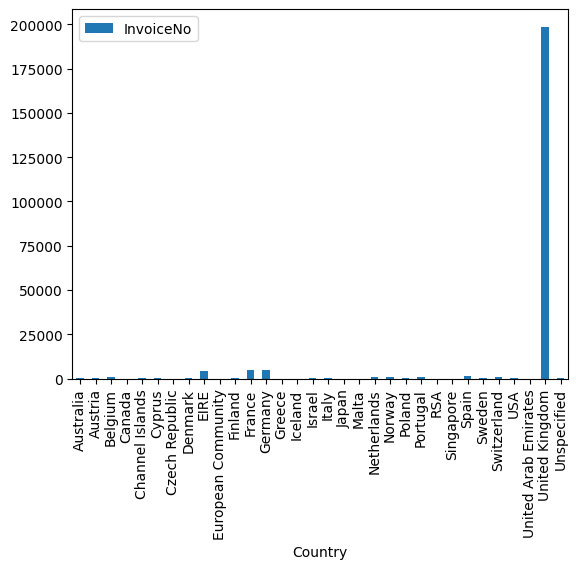

In [15]:
df_agg.plot.bar()

<AxesSubplot:xlabel='Country'>

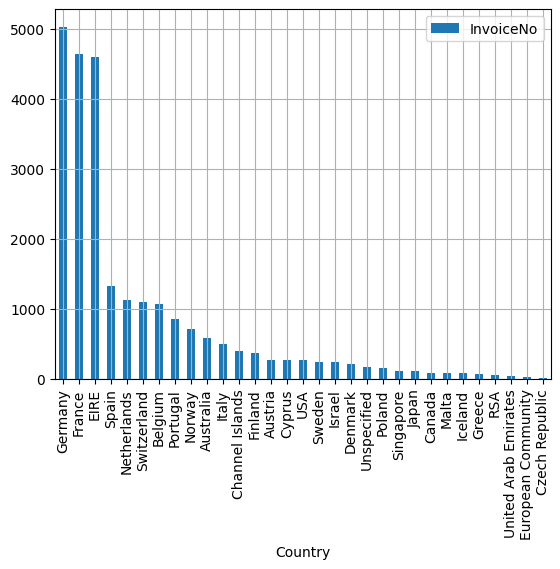

In [16]:
df_agg[df_agg.index!='United Kingdom'].sort_values(by='InvoiceNo',ascending=False).plot.bar(grid=True)

### 探索数据属性：客户和商品

In [17]:
pd.DataFrame([{'产品': len(df_initial['StockCode'].value_counts()),    
               '交易': len(df_initial['InvoiceNo'].value_counts()),
               '客户': len(df_initial['CustomerID'].value_counts()),  
              }], columns = ['产品', '交易', '客户'], 
              index = ['Quantity'])

,产品,交易,客户
Quantity,3182,11068,3341


In [18]:
df_invoice_quan=df_initial.groupby(['CustomerID', 'InvoiceNo']).count()['Quantity'].to_frame()
df_invoice_quan.reset_index(inplace=True)
df_invoice_quan

,CustomerID,InvoiceNo,Quantity
0,12347.0,562032,22
1,12347.0,573511,47
2,12347.0,581180,11
3,12348.0,568172,3
4,12349.0,577609,73
...,...,...,...
11063,18283.0,578262,107
11064,18283.0,579673,52
11065,18283.0,580872,50
11066,18287.0,570715,38


In [19]:
# inv_lst=df_invoice_quan.InvoiceNo.values.tolist()
df_cancel=df_invoice_quan.where(df_invoice_quan.InvoiceNo.apply(lambda x:int('C' in x))==1).dropna()
df_cancel

,CustomerID,InvoiceNo,Quantity
13,12359.0,C580165,4.0
23,12362.0,C563752,3.0
24,12362.0,C579178,3.0
38,12375.0,C581071,1.0
44,12380.0,C572532,1.0
...,...,...,...
11039,18268.0,C561590,1.0
11048,18274.0,C577832,11.0
11050,18276.0,C577386,1.0
11051,18276.0,C577390,1.0


In [20]:
df_cancel.sort_values(by='Quantity', ascending=False)

,CustomerID,InvoiceNo,Quantity
517,12607.0,C570867,101.0
102,12415.0,C560540,57.0
3992,14410.0,C560855,41.0
5164,14911.0,C570828,39.0
5986,15365.0,C569985,36.0
...,...,...,...
4273,14534.0,C581100,1.0
4271,14534.0,C570278,1.0
4269,14534.0,C569644,1.0
4268,14534.0,C561510,1.0


In [21]:
df_cancel.groupby(['InvoiceNo']).count()

,CustomerID,Quantity
InvoiceNo,,
C559530,1,1
C559531,1,1
C559533,1,1
C559534,1,1
C559540,1,1
...,...,...
C581484,1,1
C581490,1,1
C581499,1,1


In [22]:
df_ttlCancel=df_initial.where(df_initial.Quantity<0).dropna()
df_ttlCancel

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279,C559530,22655,VINTAGE RED KITCHEN CABINET,-1.0,2011-07-10 12:04:00,125.00,14808.0,United Kingdom
285,C559531,22846,BREAD BIN DINER STYLE RED,-1.0,2011-07-10 12:07:00,16.95,14808.0,United Kingdom
286,C559533,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,-1.0,2011-07-10 12:10:00,2.95,17126.0,United Kingdom
287,C559534,47594B,SCOTTIES DESIGN WASHBAG,-2.0,2011-07-10 12:11:00,1.95,16283.0,United Kingdom
469,C559540,21850,BLUE DIAMANTE PEN IN GIFT BOX,-36.0,2011-07-10 12:39:00,4.25,18024.0,United Kingdom
...,...,...,...,...,...,...,...,...
283249,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11.0,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
284341,C581499,M,Manual,-1.0,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
284515,C581568,21258,VICTORIAN SEWING BOX LARGE,-5.0,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
284516,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1.0,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [23]:
df_ttlCancel.Description

279               VINTAGE RED KITCHEN CABINET
285                BREAD BIN DINER STYLE RED 
286       SET/5 RED RETROSPOT LID GLASS BOWLS
287                   SCOTTIES DESIGN WASHBAG
469            BLUE  DIAMANTE PEN IN GIFT BOX
                         ...                 
283249        ZINC T-LIGHT HOLDER STARS SMALL
284341                                 Manual
284515             VICTORIAN SEWING BOX LARGE
284516       HANGING HEART JAR T-LIGHT HOLDER
284517          36 PENCILS TUBE RED RETROSPOT
Name: Description, Length: 4476, dtype: object

In [24]:
df_ttlCancel[df_ttlCancel.CustomerID==12607]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
136795,C570867,23290,SPACEBOY CHILDRENS BOWL,-8.0,2011-10-12 16:17:00,1.25,12607.0,USA
136796,C570867,23289,DOLLY GIRL CHILDRENS BOWL,-8.0,2011-10-12 16:17:00,1.25,12607.0,USA
136797,C570867,23256,CHILDRENS CUTLERY SPACEBOY,-4.0,2011-10-12 16:17:00,4.15,12607.0,USA
136798,C570867,23255,CHILDRENS CUTLERY CIRCUS PARADE,-4.0,2011-10-12 16:17:00,4.15,12607.0,USA
136799,C570867,23254,CHILDRENS CUTLERY DOLLY GIRL,-4.0,2011-10-12 16:17:00,4.15,12607.0,USA
...,...,...,...,...,...,...,...,...
136891,C570867,23293,SET OF 12 FAIRY CAKE BAKING CASES,-8.0,2011-10-12 16:17:00,0.83,12607.0,USA
136892,C570867,23292,SPACEBOY CHILDRENS CUP,-8.0,2011-10-12 16:17:00,1.25,12607.0,USA
136893,C570867,23291,DOLLY GIRL CHILDRENS CUP,-8.0,2011-10-12 16:17:00,1.25,12607.0,USA
136894,C570867,23513,EMBROIDERED RIBBON REEL SUSIE,-6.0,2011-10-12 16:17:00,2.08,12607.0,USA


In [25]:
df_ttlCancel[df_ttlCancel.CustomerID==12830]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
16735,C560869,D,Discount,-1.0,2011-07-21 14:32:00,66.24,12830.0,United Kingdom


In [26]:
df_check = df_initial[df_initial['Quantity'] < 0][
                                    ['CustomerID','Quantity', 'StockCode','Description','UnitPrice']]

for index, col in  df_check.iterrows():
    if df_initial[(df_initial['CustomerID'] == col[0]) & (df_initial['Quantity'] == -col[1]) 
                & (df_initial['Description'] == col[2])].shape[0] == 0: 
        print(df_check.loc[index])
        print(25*'-'+'>'+' 假设未完成')
        break

CustomerID                         14808.0
Quantity                                -1
StockCode                            22655
Description    VINTAGE RED KITCHEN CABINET
UnitPrice                            125.0
Name: 279, dtype: object
-------------------------> 假设未完成


In [27]:
df_check

,CustomerID,Quantity,StockCode,Description,UnitPrice
279,14808.0,-1,22655,VINTAGE RED KITCHEN CABINET,125.00
285,14808.0,-1,22846,BREAD BIN DINER STYLE RED,16.95
286,17126.0,-1,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,2.95
287,16283.0,-2,47594B,SCOTTIES DESIGN WASHBAG,1.95
469,18024.0,-36,21850,BLUE DIAMANTE PEN IN GIFT BOX,4.25
...,...,...,...,...,...
283249,14397.0,-11,23144,ZINC T-LIGHT HOLDER STARS SMALL,0.83
284341,15498.0,-1,M,Manual,224.69
284515,15311.0,-5,21258,VICTORIAN SEWING BOX LARGE,10.95
284516,17315.0,-1,84978,HANGING HEART JAR T-LIGHT HOLDER,1.25


In [28]:
df_initial.where(df_initial.CustomerID==14808).dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
247,559529,22431,WATERING CAN BLUE ELEPHANT,1.0,2011-07-10 12:03:00,1.95,14808.0,United Kingdom
248,559529,21731,RED TOADSTOOL LED NIGHT LIGHT,1.0,2011-07-10 12:03:00,1.65,14808.0,United Kingdom
249,559529,22433,WATERING CAN GREEN DINOSAUR,1.0,2011-07-10 12:03:00,1.95,14808.0,United Kingdom
250,559529,22432,WATERING CAN PINK BUNNY,1.0,2011-07-10 12:03:00,1.95,14808.0,United Kingdom
251,559529,23077,DOUGHNUT LIP GLOSS,60.0,2011-07-10 12:03:00,1.25,14808.0,United Kingdom
...,...,...,...,...,...,...,...,...
171752,573510,23349,ROLL WRAP VINTAGE CHRISTMAS,12.0,2011-10-31 12:21:00,1.25,14808.0,United Kingdom
171753,573510,20961,STRAWBERRY BATH SPONGE,1.0,2011-10-31 12:21:00,1.25,14808.0,United Kingdom
171754,573510,20963,APPLE BATH SPONGE,1.0,2011-10-31 12:21:00,1.25,14808.0,United Kingdom
171755,573510,23527,WALL ART ANIMALS AND NATURE,1.0,2011-10-31 12:21:00,3.75,14808.0,United Kingdom


In [29]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223352 entries, 19 to 284708
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    223352 non-null  object        
 1   StockCode    223352 non-null  object        
 2   Description  223352 non-null  object        
 3   Quantity     223352 non-null  int64         
 4   InvoiceDate  223352 non-null  datetime64[ns]
 5   UnitPrice    223352 non-null  float64       
 6   CustomerID   223352 non-null  float64       
 7   Country      223352 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 15.3+ MB


删除重复值

In [30]:
df_initial_noDup=df_initial.drop_duplicates()
df_initial_noDup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220177 entries, 19 to 284708
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    220177 non-null  object        
 1   StockCode    220177 non-null  object        
 2   Description  220177 non-null  object        
 3   Quantity     220177 non-null  int64         
 4   InvoiceDate  220177 non-null  datetime64[ns]
 5   UnitPrice    220177 non-null  float64       
 6   CustomerID   220177 non-null  float64       
 7   Country      220177 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 15.1+ MB


In [31]:
df_initial_noDup

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
19,559519,22662,LUNCH BAG DOLLY GIRL DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom
20,559519,22383,LUNCH BAG SUKI DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom
21,559519,20728,LUNCH BAG CARS BLUE,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom
22,559519,22382,LUNCH BAG SPACEBOY DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom
98,559523,23164,REGENCY CAKE SLICE,1,2011-07-08 17:19:00,4.95,13955.0,United Kingdom
...,...,...,...,...,...,...,...,...
284704,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
284705,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
284706,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
284707,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


下面对取消的订单进行了一次普查，并检查是否有对应购买订单存在。

In [32]:
df_cleaned = df_initial_noDup.copy(deep = True)
df_cleaned['取消订单数量'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df_initial_noDup.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df_initial_noDup[(df_initial_noDup['CustomerID'] == col['CustomerID']) &
                               (df_initial_noDup['StockCode']  == col['StockCode']) & 
                               (df_initial_noDup['InvoiceDate'] < col['InvoiceDate']) & 
                               (df_initial_noDup['Quantity'] > 0)].copy()

    # 没有对应项的取消订单
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
   
    # 有对应项的取消订单
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, '取消订单数量'] = -col['Quantity']
        entry_to_remove.append(index)        
   
    # 不同的对应项是按顺序存在的:我们删除最后一个
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, '取消订单数量'] = -col['Quantity']
            entry_to_remove.append(index) 
            break 

# 打印没有对应购买记录的取消订单 和 有对应购买记录的取消订单
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 3424
doubtfull_entry: 984


In [33]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220177 entries, 19 to 284708
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    220177 non-null  object        
 1   StockCode    220177 non-null  object        
 2   Description  220177 non-null  object        
 3   Quantity     220177 non-null  int64         
 4   InvoiceDate  220177 non-null  datetime64[ns]
 5   UnitPrice    220177 non-null  float64       
 6   CustomerID   220177 non-null  float64       
 7   Country      220177 non-null  object        
 8   取消订单数量       220177 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 24.9+ MB


In [34]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223352 entries, 19 to 284708
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    223352 non-null  object        
 1   StockCode    223352 non-null  object        
 2   Description  223352 non-null  object        
 3   Quantity     223352 non-null  int64         
 4   InvoiceDate  223352 non-null  datetime64[ns]
 5   UnitPrice    223352 non-null  float64       
 6   CustomerID   223352 non-null  float64       
 7   Country      223352 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 15.3+ MB


In [35]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("要删除的记录数量: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

要删除的记录数量: 10


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,取消订单数量
76464,C566209,23355,HOT WATER BOTTLE KEEP CALM,-5,2011-09-09 15:04:00,4.95,16362.0,United Kingdom,0
80564,C566467,22384,LUNCH BAG PINK POLKADOT,-14,2011-09-12 18:04:00,1.65,14688.0,United Kingdom,0
103337,C568232,23007,SPACEBOY BABY GIFT SET,-3,2011-09-26 11:27:00,16.95,14808.0,United Kingdom,0
165413,C573097,23251,VINTAGE RED ENAMEL TRIM MUG,-18,2011-10-27 14:42:00,1.25,15038.0,United Kingdom,0
177723,C574065,22945,CHRISTMAS METAL TAGS ASSORTED,-24,2011-11-02 14:43:00,0.85,13271.0,United Kingdom,0


In [36]:
remaining_entries

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,取消订单数量
76464,C566209,23355,HOT WATER BOTTLE KEEP CALM,-5,2011-09-09 15:04:00,4.95,16362.0,United Kingdom,0
80564,C566467,22384,LUNCH BAG PINK POLKADOT,-14,2011-09-12 18:04:00,1.65,14688.0,United Kingdom,0
103337,C568232,23007,SPACEBOY BABY GIFT SET,-3,2011-09-26 11:27:00,16.95,14808.0,United Kingdom,0
165413,C573097,23251,VINTAGE RED ENAMEL TRIM MUG,-18,2011-10-27 14:42:00,1.25,15038.0,United Kingdom,0
177723,C574065,22945,CHRISTMAS METAL TAGS ASSORTED,-24,2011-11-02 14:43:00,0.85,13271.0,United Kingdom,0
183052,C574524,22947,WOODEN ADVENT CALENDAR RED,-2,2011-11-04 13:53:00,7.95,17841.0,United Kingdom,0
259575,C579948,21098,CHRISTMAS TOILET ROLL,-3,2011-12-01 10:56:00,1.25,16376.0,United Kingdom,0
262933,C580263,M,Manual,-4,2011-12-02 12:43:00,9.95,12536.0,France,0
262934,C580263,M,Manual,-16,2011-12-02 12:43:00,0.29,12536.0,France,0
270155,C580708,84946,ANTIQUE SILVER T-LIGHT GLASS,-12,2011-12-05 16:33:00,1.25,14546.0,United Kingdom,0


In [37]:
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,取消订单数量
19,559519,22662,LUNCH BAG DOLLY GIRL DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0
20,559519,22383,LUNCH BAG SUKI DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0
21,559519,20728,LUNCH BAG CARS BLUE,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0
22,559519,22382,LUNCH BAG SPACEBOY DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0
98,559523,23164,REGENCY CAKE SLICE,1,2011-07-08 17:19:00,4.95,13955.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
284704,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
284705,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
284706,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
284707,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


In [38]:
df_cleaned[(df_cleaned['CustomerID'] == 14808) & (df_cleaned['StockCode'] == '22655')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,取消订单数量


#### 库存代码分析

In [39]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215769 entries, 19 to 284708
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    215769 non-null  object        
 1   StockCode    215769 non-null  object        
 2   Description  215769 non-null  object        
 3   Quantity     215769 non-null  int64         
 4   InvoiceDate  215769 non-null  datetime64[ns]
 5   UnitPrice    215769 non-null  float64       
 6   CustomerID   215769 non-null  float64       
 7   Country      215769 non-null  object        
 8   取消订单数量       215769 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 16.5+ MB


In [40]:
# 找出 InvoiceNo 字段的特殊字符
list_special_codes=df_cleaned[df_cleaned.StockCode.str.contains('^[A-Za-z]+', regex=True)].StockCode.unique()
list_special_codes

array(['M', 'POST', 'D', 'C2', 'PADS', 'DOT', 'BANK CHARGES'],
      dtype=object)

In [41]:
for code in list_special_codes:
    print('"{:<15} " is " {:<30}"'.format(code, df_cleaned[df_cleaned['StockCode']==code].Description.unique()[0]))

"M               " is " Manual                        "
"POST            " is " POSTAGE                       "
"D               " is " Discount                      "
"C2              " is " CARRIAGE                      "
"PADS            " is " PADS TO MATCH ALL CUSHIONS    "
"DOT             " is " DOTCOM POSTAGE                "
"BANK CHARGES    " is " Bank Charges                  "


In [42]:
df_cleaned['TotalPrice']=df_cleaned['UnitPrice'] * (df_cleaned.Quantity - df_cleaned['取消订单数量'])
df_cleaned.sort_values('CustomerID')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,取消订单数量,TotalPrice
171803,573511,22131,FOOD CONTAINER SET 3 LOVE HEART,6,2011-10-31 12:25:00,1.95,12347.0,Iceland,0,11.70
171761,573511,22375,AIRLINE BAG VINTAGE JET SET BROWN,8,2011-10-31 12:25:00,4.25,12347.0,Iceland,0,34.00
171762,573511,22371,AIRLINE BAG VINTAGE TOKYO 78,12,2011-10-31 12:25:00,3.95,12347.0,Iceland,0,47.40
171763,573511,22374,AIRLINE BAG VINTAGE JET SET RED,8,2011-10-31 12:25:00,4.25,12347.0,Iceland,0,34.00
171764,573511,22252,BIRDCAGE DECORATION TEALIGHT HOLDER,12,2011-10-31 12:25:00,1.25,12347.0,Iceland,0,15.00
...,...,...,...,...,...,...,...,...,...,...
135550,570715,23310,BUBBLEGUM RING ASSORTED,36,2011-10-12 10:23:00,0.42,18287.0,United Kingdom,0,15.12
135534,570715,23376,PACK OF 12 VINTAGE CHRISTMAS TISSUE,48,2011-10-12 10:23:00,0.39,18287.0,United Kingdom,0,18.72
135548,570715,23078,ICE CREAM PEN LIP GLOSS,24,2011-10-12 10:23:00,1.25,18287.0,United Kingdom,0,30.00
135546,570715,23445,ICE CREAM BUBBLES,20,2011-10-12 10:23:00,0.83,18287.0,United Kingdom,0,16.60


In [43]:
# 以客户ID和订单编号作为聚合对象，对总价进行求和
temp=df_cleaned.groupby(['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
df_busketP=temp.rename(columns={'TotalPrice':'BasketPrice'})
df_busketP

,CustomerID,InvoiceNo,BasketPrice
0,12347.0,562032,584.91
1,12347.0,573511,1294.32
2,12347.0,581180,224.82
3,12348.0,568172,310.00
4,12349.0,577609,1757.55
...,...,...,...
9417,18283.0,578262,307.05
9418,18283.0,579673,220.31
9419,18283.0,580872,208.00
9420,18287.0,570715,1001.32


In [44]:
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,取消订单数量,TotalPrice,InvoiceDate_int
19,559519,22662,LUNCH BAG DOLLY GIRL DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0,217.50,1310141820000000000
20,559519,22383,LUNCH BAG SUKI DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0,217.50,1310141820000000000
21,559519,20728,LUNCH BAG CARS BLUE,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0,217.50,1310141820000000000
22,559519,22382,LUNCH BAG SPACEBOY DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0,217.50,1310141820000000000
98,559523,23164,REGENCY CAKE SLICE,1,2011-07-08 17:19:00,4.95,13955.0,United Kingdom,0,4.95,1310145540000000000
...,...,...,...,...,...,...,...,...,...,...,...
284704,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0,10.20,1323435000000000000
284705,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0,12.60,1323435000000000000
284706,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60,1323435000000000000
284707,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60,1323435000000000000


In [45]:
temp = df_cleaned.groupby(by=['CustomerID', 'StockCode'], as_index=False)['InvoiceDate_int'].mean()
temp

,CustomerID,StockCode,InvoiceDate_int
0,12347.0,20719,1.318537e+18
1,12347.0,21064,1.323273e+18
2,12347.0,21265,1.321669e+18
3,12347.0,21578,1.312275e+18
4,12347.0,21636,1.320064e+18
...,...,...,...
162347,18287.0,72351A,1.318415e+18
162348,18287.0,72351B,1.318415e+18
162349,18287.0,85039A,1.318415e+18
162350,18287.0,85039B,1.318415e+18


In [46]:
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,取消订单数量,TotalPrice
19,559519,22662,LUNCH BAG DOLLY GIRL DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0,217.50
20,559519,22383,LUNCH BAG SUKI DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0,217.50
21,559519,20728,LUNCH BAG CARS BLUE,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0,217.50
22,559519,22382,LUNCH BAG SPACEBOY DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0,217.50
98,559523,23164,REGENCY CAKE SLICE,1,2011-07-08 17:19:00,4.95,13955.0,United Kingdom,0,4.95
...,...,...,...,...,...,...,...,...,...,...
284704,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0,10.20
284705,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0,12.60
284706,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60
284707,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60


In [47]:
df_busketP.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
df_busketP

,CustomerID,InvoiceNo,BasketPrice,InvoiceDate
0,12347.0,562032,584.91,2011-10-13 20:21:40
1,12347.0,573511,1294.32,2011-12-07 15:52:00
2,12347.0,581180,224.82,2011-11-19 02:08:30
3,12348.0,568172,310.00,2011-08-02 08:48:00
4,12349.0,577609,1757.55,2011-10-31 12:25:00
...,...,...,...,...
9417,18283.0,578262,307.05,2011-10-13 13:53:00
9418,18283.0,579673,220.31,2011-10-13 13:53:00
9419,18283.0,580872,208.00,2011-10-13 13:53:00
9420,18287.0,570715,1001.32,2011-08-02 09:35:00


In [48]:
df_busketP[df_busketP['BasketPrice'] <= 0]

,CustomerID,InvoiceNo,BasketPrice,InvoiceDate
70,12409.0,567642,0.0,2011-11-21 09:51:00
77,12415.0,560491,0.0,2011-11-21 09:51:00
151,12454.0,571255,0.0,2011-09-24 14:46:00
159,12457.0,569489,0.0,2011-11-03 14:37:00
189,12473.0,575636,0.0,2011-11-06 16:07:00
...,...,...,...,...
8879,17888.0,577322,0.0,2011-12-08 11:25:00
8937,17949.0,559793,0.0,2011-12-08 11:25:00
8956,17949.0,580169,0.0,2011-08-25 15:04:00
9249,18167.0,C576244,-6.0,2011-10-06 15:51:00


In [49]:
df_busketP=df_busketP[df_busketP['BasketPrice'] > 0]
df_busketP

,CustomerID,InvoiceNo,BasketPrice,InvoiceDate
0,12347.0,562032,584.91,2011-10-13 20:21:40
1,12347.0,573511,1294.32,2011-12-07 15:52:00
2,12347.0,581180,224.82,2011-11-19 02:08:30
3,12348.0,568172,310.00,2011-08-02 08:48:00
4,12349.0,577609,1757.55,2011-10-31 12:25:00
...,...,...,...,...
9417,18283.0,578262,307.05,2011-10-13 13:53:00
9418,18283.0,579673,220.31,2011-10-13 13:53:00
9419,18283.0,580872,208.00,2011-10-13 13:53:00
9420,18287.0,570715,1001.32,2011-08-02 09:35:00


In [50]:
df_busketP.BasketPrice.max()

30757.0

In [51]:
df_busketP.BasketPrice.min()

0.38

--开始画图--

首先，将BasketPrice归入不同的组

In [52]:
price_rng=[0, 50, 150, 300, 500, 750, 1050, 5250, 50000]
cnt_price=[]
for i, price in enumerate(price_rng):
    if i == 0: continue
    val=df_busketP[(df_busketP.BasketPrice < price)
                   &(df_busketP.BasketPrice > price_rng[i-1])].BasketPrice.count()
    cnt_price.append(val)
cnt_price

[556, 1536, 2357, 2653, 1036, 537, 579, 59]

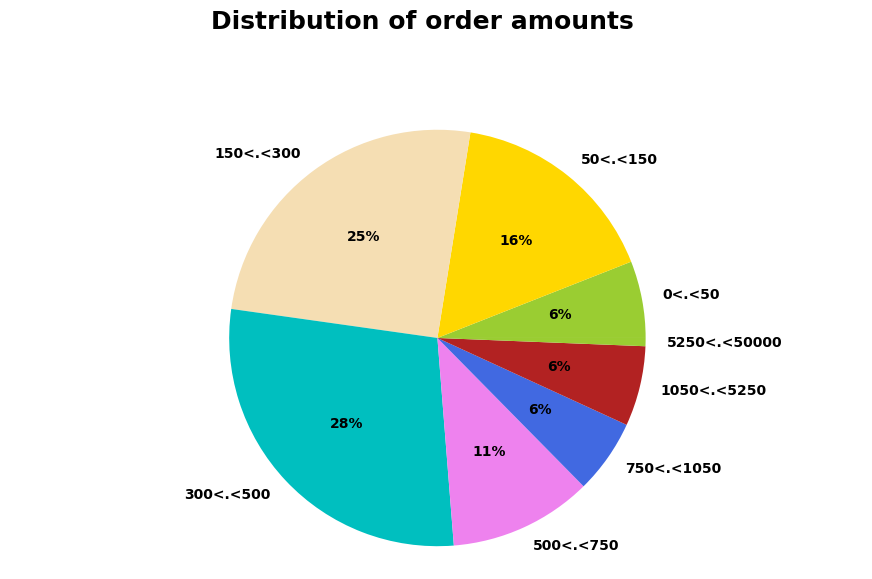

In [53]:
# Representation of the number of purchases / amount       
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_rng[i-1], s) for i,s in enumerate(price_rng) if i != 0]
sizes  = cnt_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of order amounts", ha='center', fontsize = 18);

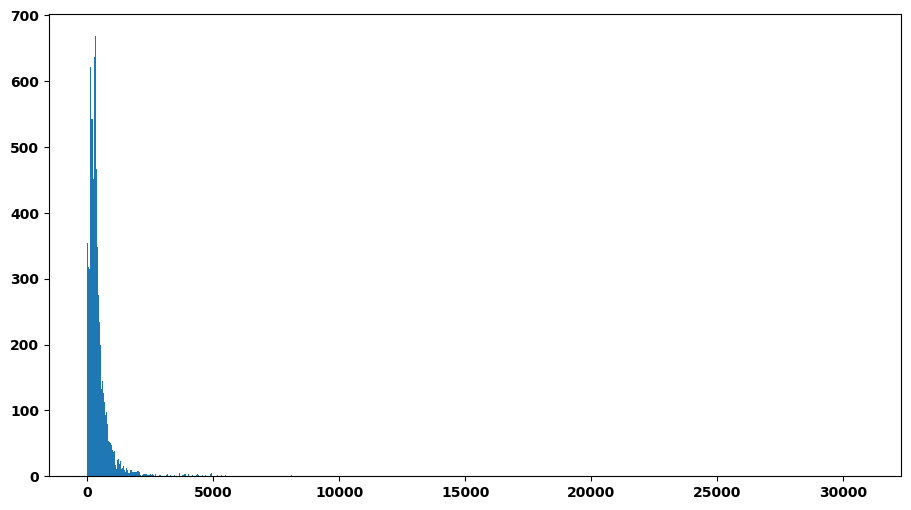

In [54]:
# Representation of the number of purchases / amount       
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
ax.hist(x=df_busketP.BasketPrice.to_list(), bins=1000)
plt.show()

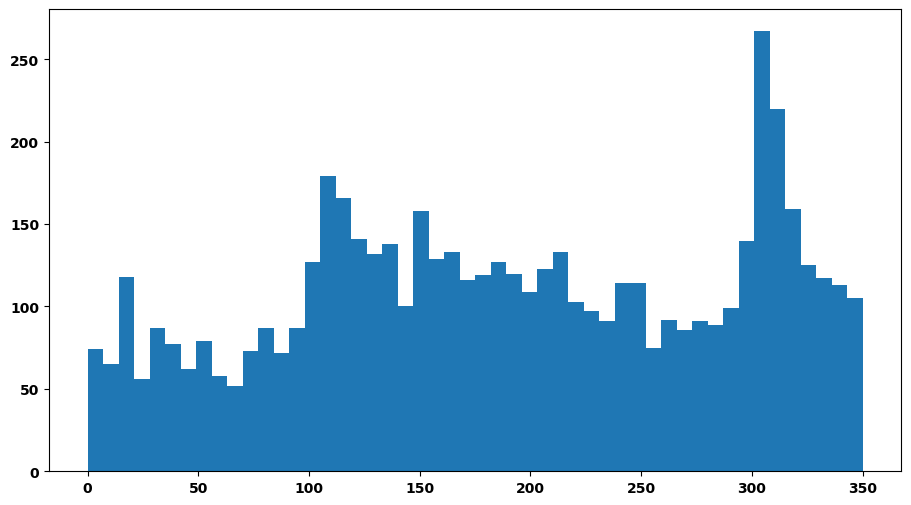

In [55]:
# Representation of the number of purchases / amount       
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
ax.hist(x=df_busketP.BasketPrice.to_list(), bins=50, range=(0, 350))
plt.show()

#### 产品类别分析

产品描述

In [56]:
import nltk
#nltk.download('punkt')
# nltk.word_tokenize('today is friday') # Output ['today', 'is', 'friday']

In [57]:
df_produits = pd.DataFrame(df_initial['Description'].unique()).rename(columns = {0:'Description'})
df_produits

,Description
0,LUNCH BAG DOLLY GIRL DESIGN
1,LUNCH BAG SUKI DESIGN
2,LUNCH BAG CARS BLUE
3,LUNCH BAG SPACEBOY DESIGN
4,REGENCY CAKE SLICE
...,...
3300,RED ACRYLIC FACETED BANGLE
3301,SET 3 SONG BIRD PAPER EGGS ASSORTED
3302,VINTAGE ENAMEL & CRYSTAL EARRINGS
3303,CREAM HANGING HEART T-LIGHT HOLDER


In [58]:
is_noun = lambda pos: pos[:2] == 'NN'
stemmer = nltk.stem.SnowballStemmer("english")
keywords_roots  = dict()  # 收集单词或词根
keywords_select = dict()  # 关联: 词根<->关键字
category_keys   = []
count_keywords  = dict()
icount = 0

for s in df_produits['Description']:   # 循环获取数据集中每条信息
    if pd.isnull(s): continue  # 过滤是否是空值
    lines = s.lower()          # 小写转换
    tokenized = nltk.word_tokenize(lines)  # 分词
    # 筛选名词词性
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
    for t in nouns:
        t = t.lower() 
        racine = stemmer.stem(t) # 词根提取
        if racine in keywords_roots:                
            keywords_roots[racine].add(t)
            count_keywords[racine] += 1                
        else:
            keywords_roots[racine] = {t}
            count_keywords[racine] = 1

for s in keywords_roots.keys():
    if len(keywords_roots[s]) > 1:  
        min_length = 1000
        for k in keywords_roots[s]:
            if len(k) < min_length:
                clef = k 
                min_length = len(k)            
        category_keys.append(clef)
        keywords_select[s] = clef
    else:
        category_keys.append(list(keywords_roots[s])[0])
        keywords_select[s] = list(keywords_roots[s])[0]
                
print("变量中关键字'{}'的数量 : {}".format('Description',len(category_keys)))
# keywords_roots[s]
# keywords_select
category_keys
# count_keywords

变量中关键字'Description'的数量 : 1347


['lunch',
 'bag',
 'design',
 'suki',
 'car',
 'spaceboy',
 'regency',
 'cake',
 'slice',
 'magic',
 'garden',
 'set',
 'heart',
 'cookie',
 'cutter',
 'sweetheart',
 'fairy',
 'case',
 'toast',
 'i',
 'flock',
 'photo',
 'frame',
 'jungle',
 'popsicles',
 'mould',
 'holder',
 'pack',
 'tissue',
 'gift',
 'tape',
 'picnic',
 'basket',
 'wicker',
 'charm',
 'measure',
 'spoon',
 'shape',
 'cup',
 'ivory',
 'cakestand',
 'tier',
 'chalkboard',
 'record',
 'cover',
 'teacup',
 'saucer',
 'pink',
 'roses',
 'sugar',
 'bowl',
 'retrospot',
 'treasure',
 'tin',
 'gymkhana',
 'drawer',
 'knob',
 'crackle',
 'glaze',
 'wooden',
 'kitchen',
 'scales',
 'mini',
 'magnet',
 'day',
 'jam',
 'jar',
 'box',
 'medium',
 'bath',
 'building',
 'block',
 'word',
 'egg',
 'paper',
 'doilies',
 'clothes',
 'set/2',
 'tea',
 'towel',
 'children',
 'apron',
 'orange',
 'marshmallows',
 'chocolate',
 'holiday',
 'metal',
 'sign',
 'home',
 'sweet',
 'set/5',
 'glass',
 'lovebird',
 'coaster',
 'dog',
 'baby'

In [59]:
# for k,v in count_keywords.items():
#     # print(k, v)
#     print(keywords_select[k], v)
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)
list_products

[['heart', 234],
 ['vintage', 191],
 ['set', 183],
 ['box', 137],
 ['bag', 136],
 ['pink', 136],
 ['christmas', 119],
 ['design', 116],
 ['candle', 107],
 ['holder', 105],
 ['decoration', 98],
 ['glass', 91],
 ['flower', 87],
 ['retrospot', 86],
 ['metal', 84],
 ['card', 84],
 ['paper', 75],
 ['art', 71],
 ['necklac', 68],
 ['blue', 67],
 ['silver', 62],
 ['tin', 59],
 ['wrap', 59],
 ['cake', 58],
 ['pack', 58],
 ['sign', 58],
 ['star', 55],
 ['mini', 54],
 ['mug', 54],
 ['cover', 53],
 ['polkadot', 52],
 ['wall', 51],
 ['frame', 49],
 ['egg', 49],
 ['home', 49],
 ['garden', 47],
 ['gift', 47],
 ['ivory', 45],
 ['bowl', 45],
 ['ring', 44],
 ['mirror', 43],
 ['tea', 42],
 ['bird', 42],
 ['cushion', 42],
 ['bracelet', 42],
 ['clock', 41],
 ['cream', 41],
 ['paisley', 40],
 ['party', 40],
 ['letter', 40],
 ['ribbon', 38],
 ['bottle', 38],
 ['wood', 37],
 ['drawer', 36],
 ['jar', 35],
 ['pencil', 35],
 ['earrings', 35],
 ['hook', 34],
 ['skull', 34],
 ['garland', 33],
 ['zinc', 32],
 ['wat

In [60]:
len(count_keywords)

1347

In [61]:
len(keywords_select)

1347

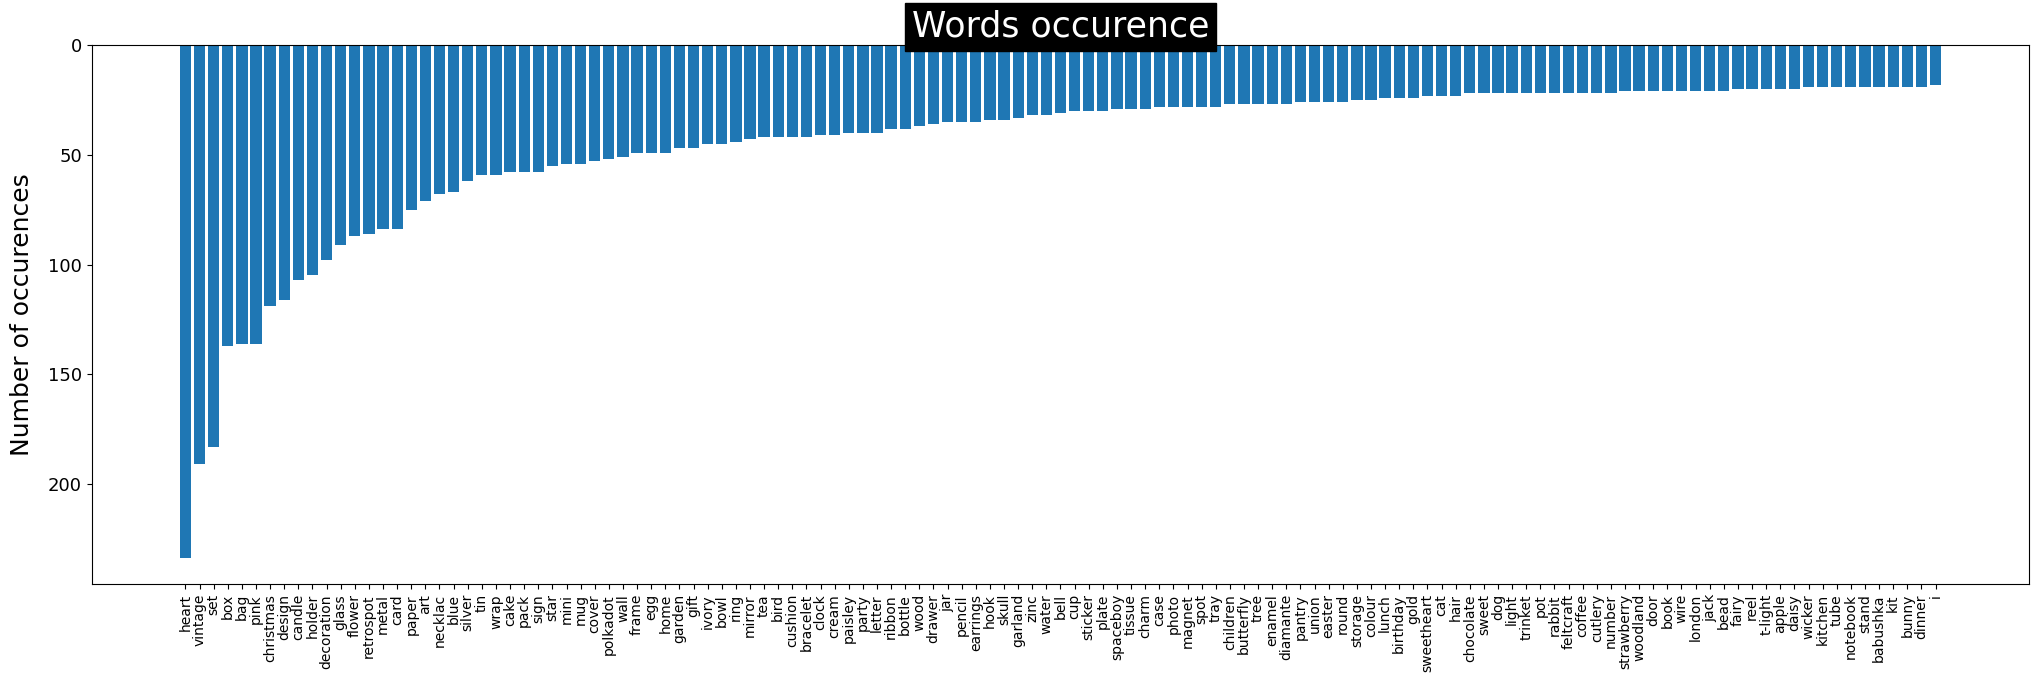

In [62]:
liste = sorted(list_products, key = lambda x:x[1], reverse = True)

plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(25, 7))
# x_axis = [i[1] if n//2 == 0 else '' for n,i in enumerate(liste[:125])]
x_axis = [i[1] for i in liste[:125]]

y_axis = [k for k,i in enumerate(liste[:125])]
y_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 10,rotation=90)
plt.yticks(fontsize = 13)
plt.xticks(y_axis, y_label)
plt.ylabel("Number of occurences", fontsize = 18, labelpad = 10)
ax.bar(y_axis, x_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()

plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

In [63]:
list_products

[['heart', 234],
 ['vintage', 191],
 ['set', 183],
 ['box', 137],
 ['bag', 136],
 ['pink', 136],
 ['christmas', 119],
 ['design', 116],
 ['candle', 107],
 ['holder', 105],
 ['decoration', 98],
 ['glass', 91],
 ['flower', 87],
 ['retrospot', 86],
 ['metal', 84],
 ['card', 84],
 ['paper', 75],
 ['art', 71],
 ['necklac', 68],
 ['blue', 67],
 ['silver', 62],
 ['tin', 59],
 ['wrap', 59],
 ['cake', 58],
 ['pack', 58],
 ['sign', 58],
 ['star', 55],
 ['mini', 54],
 ['mug', 54],
 ['cover', 53],
 ['polkadot', 52],
 ['wall', 51],
 ['frame', 49],
 ['egg', 49],
 ['home', 49],
 ['garden', 47],
 ['gift', 47],
 ['ivory', 45],
 ['bowl', 45],
 ['ring', 44],
 ['mirror', 43],
 ['tea', 42],
 ['bird', 42],
 ['cushion', 42],
 ['bracelet', 42],
 ['clock', 41],
 ['cream', 41],
 ['paisley', 40],
 ['party', 40],
 ['letter', 40],
 ['ribbon', 38],
 ['bottle', 38],
 ['wood', 37],
 ['drawer', 36],
 ['jar', 35],
 ['pencil', 35],
 ['earrings', 35],
 ['hook', 34],
 ['skull', 34],
 ['garland', 33],
 ['zinc', 32],
 ['wat

In [64]:
list_products = []
dict_products = {}
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
    dict_products[word] = v

list_products.sort(key = lambda x:x[1], reverse = True)
print(dict_products)
print('保留字:', len(list_products))

{'lunch': 24, 'bag': 136, 'design': 116, 'spaceboy': 29, 'regency': 16, 'cake': 58, 'garden': 47, 'set': 183, 'heart': 234, 'sweetheart': 23, 'fairy': 20, 'case': 28, 'photo': 28, 'frame': 49, 'holder': 105, 'pack': 58, 'tissue': 29, 'gift': 47, 'tape': 16, 'basket': 14, 'wicker': 19, 'charm': 29, 'shape': 15, 'cup': 30, 'ivory': 45, 'cover': 53, 'bowl': 45, 'retrospot': 86, 'tin': 59, 'drawer': 36, 'knob': 18, 'wooden': 14, 'kitchen': 19, 'mini': 54, 'magnet': 28, 'jam': 17, 'jar': 35, 'box': 137, 'medium': 14, 'egg': 49, 'paper': 75, 'doilies': 15, 'tea': 42, 'towel': 14, 'children': 27, 'chocolate': 22, 'metal': 84, 'sign': 58, 'home': 49, 'sweet': 22, 'glass': 91, 'coaster': 13, 'dog': 22, 'antique': 18, 'pantry': 26, 'mirror': 43, 'butterfly': 27, 'vintage': 191, 'spot': 28, 'art': 71, 'bird': 42, 'tree': 27, 'hanger': 16, 'table': 13, 'clock': 41, 'hook': 34, 'parasol': 15, 'ribbon': 38, 'reel': 20, 'stripe': 15, 'paisley': 40, 'light': 22, 'cottage': 15, 'flower': 87, 'doiley': 

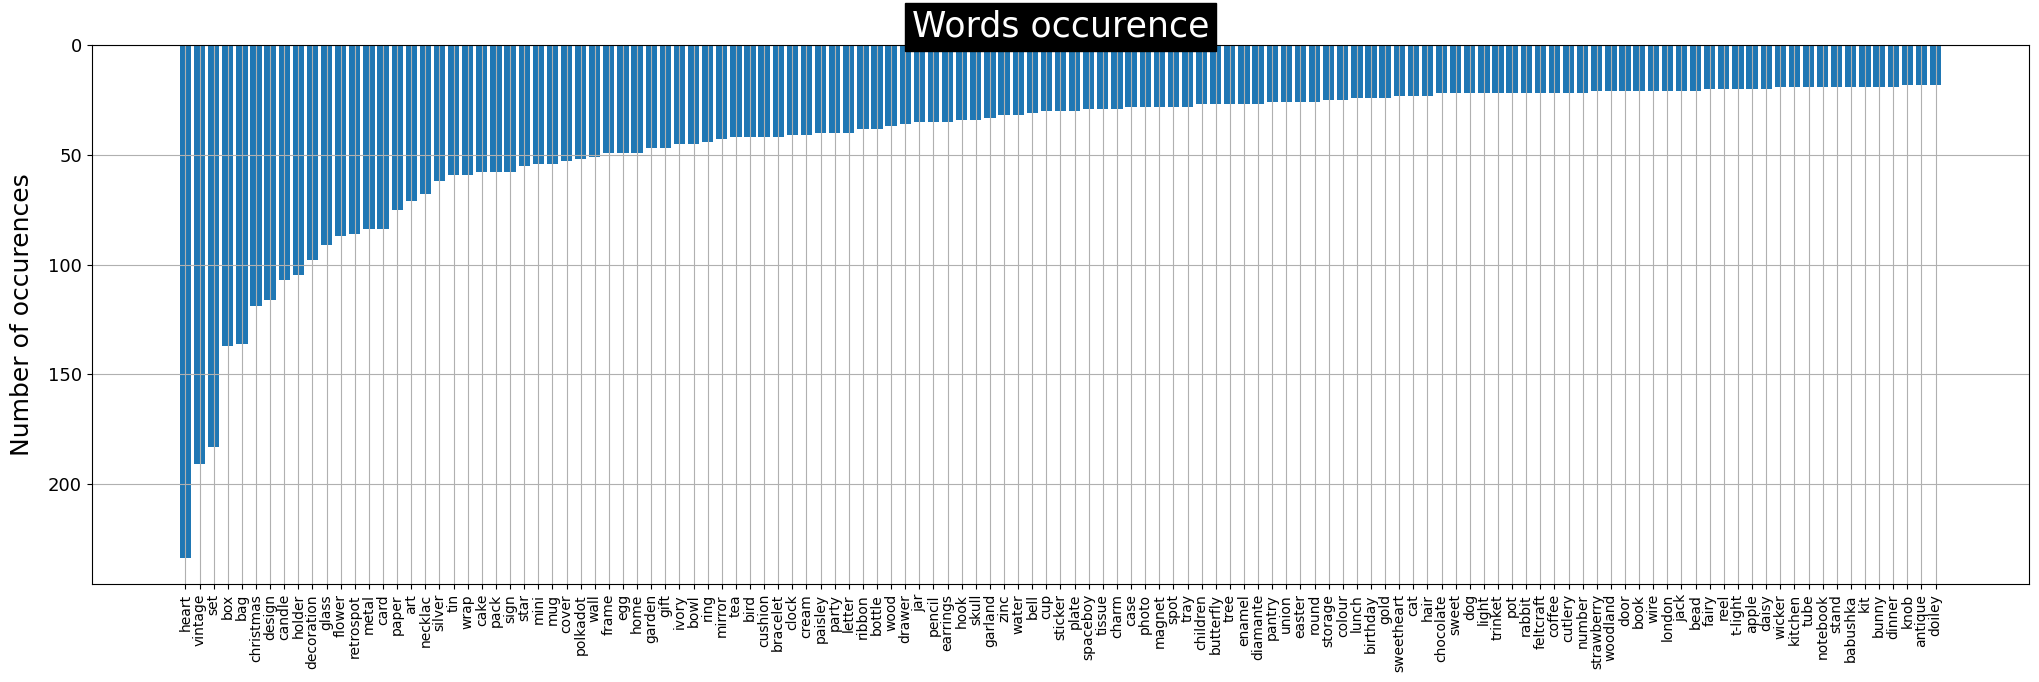

In [65]:
liste = sorted(list_products, key = lambda x:x[1], reverse = True)

plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(25, 7))
# x_axis = [i[1] if n//2 == 0 else '' for n,i in enumerate(liste[:125])]
x_axis = [i[1] for i in liste[:125]]

y_axis = [k for k,i in enumerate(liste[:125])]
y_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 10,rotation=90)
plt.yticks(fontsize = 13)
plt.xticks(y_axis, y_label)
plt.ylabel("Number of occurences", fontsize = 18, labelpad = 10)
ax.bar(y_axis, x_axis, align = 'center')
plt.grid()
ax = plt.gca()
ax.invert_yaxis()

plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

数据编码

In [66]:
df_cleaned_newIndex=df_cleaned.reset_index()
df_cleaned_newIndex.Description

0             LUNCH BAG DOLLY GIRL DESIGN
1                  LUNCH BAG SUKI DESIGN 
2                     LUNCH BAG CARS BLUE
3              LUNCH BAG SPACEBOY DESIGN 
4                      REGENCY CAKE SLICE
                       ...               
215764        PACK OF 20 SPACEBOY NAPKINS
215765       CHILDREN'S APRON DOLLY GIRL 
215766      CHILDRENS CUTLERY DOLLY GIRL 
215767    CHILDRENS CUTLERY CIRCUS PARADE
215768      BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 215769, dtype: object

In [67]:
df_cleaned_newIndex[df_cleaned_newIndex.Description.duplicated()]['Description']

79           SMALL HEART MEASURING SPOONS
80           LARGE HEART MEASURING SPOONS
85                NO JUNK MAIL METAL SIGN
99            LUNCH BAG DOLLY GIRL DESIGN
113             I'M ON HOLIDAY METAL SIGN
                       ...               
215764        PACK OF 20 SPACEBOY NAPKINS
215765       CHILDREN'S APRON DOLLY GIRL 
215766      CHILDRENS CUTLERY DOLLY GIRL 
215767    CHILDRENS CUTLERY CIRCUS PARADE
215768      BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 212471, dtype: object

In [68]:
df_cleaned_newIndex.Description.drop_duplicates()

0                 LUNCH BAG DOLLY GIRL DESIGN
1                      LUNCH BAG SUKI DESIGN 
2                         LUNCH BAG CARS BLUE
3                  LUNCH BAG SPACEBOY DESIGN 
4                          REGENCY CAKE SLICE
                         ...                 
211995      2 PICTURE BOOK EGGS EASTER CHICKS
211997    SET 3 SONG BIRD PAPER EGGS ASSORTED
212530      VINTAGE ENAMEL & CRYSTAL EARRINGS
213214     CREAM HANGING HEART T-LIGHT HOLDER
215303            PAPER CRAFT , LITTLE BIRDIE
Name: Description, Length: 3298, dtype: object

In [69]:
seri_products=pd.Series(dict_products)
df_products=pd.DataFrame(seri_products)
df_products.reset_index(inplace=True)
df_products.rename(columns={"index":"wrdFeature", 0:"wrdCnt"}, inplace=True)
df_products
#pd.get_dummies()

,wrdFeature,wrdCnt
0,lunch,24
1,bag,136
2,design,116
3,spaceboy,29
4,regency,16
...,...,...
159,earrings,35
160,number,22
161,necklac,68
162,hair,23


In [70]:
# pd.get_dummies(df_products)
# df_products.wrdCnt.max()    # 234
# df_products.wrdCnt.min()    # 13
# 10~239, 分5组，步长46
wrdGrp_lst=[]
for num in df_products.wrdCnt:
    if num > 10 and num <= 56: wrdGrp_lst.append(1)
    if num > 56 and num <= 102: wrdGrp_lst.append(2)
    if num > 102 and num <= 148: wrdGrp_lst.append(3)
    if num > 148 and num <= 194: wrdGrp_lst.append(4)
    if num > 194 and num <= 240: wrdGrp_lst.append(5)

seri_wrdGrp=pd.Series(wrdGrp_lst)
seri_wrdGrp.value_counts()

1    140
2     15
3      6
4      2
5      1
dtype: int64

In [71]:
pd.get_dummies(df_products)

,wrdCnt,wrdFeature_antique,wrdFeature_apple,wrdFeature_art,wrdFeature_babushka,wrdFeature_bag,wrdFeature_ball,wrdFeature_basket,wrdFeature_bathroom,wrdFeature_bead,...,wrdFeature_warmer,wrdFeature_water,wrdFeature_wicker,wrdFeature_wire,wrdFeature_wood,wrdFeature_wooden,wrdFeature_woodland,wrdFeature_wrap,wrdFeature_wreath,wrdFeature_zinc
0,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,136,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,116,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161,68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
liste_produits = df_cleaned.Description.unique()
print(liste_produits[0:2])
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), liste_produits))
print(X[0:1])

['LUNCH BAG DOLLY GIRL DESIGN' 'LUNCH BAG SUKI DESIGN ']
   heart  vintage  set  box  bag  christmas  design  candle  holder  \
0      0        0    0    0    1          0       1       0       0   

   decoration  ...  picture  bathroom  travel  biscuit  orbit  coaster  table  \
0           0  ...        0         0       0        0      0        0      0   

   purse  tidy  shell  
0      0     0      0  

[1 rows x 164 columns]


In [73]:
X

,heart,vintage,set,box,bag,christmas,design,candle,holder,decoration,...,picture,bathroom,travel,biscuit,orbit,coaster,table,purse,tidy,shell
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3294,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3295,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3296,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    #print(i)
    #print(col)
    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(liste_produits):
    prix = df_cleaned[ df_cleaned['Description'] == prod]['UnitPrice'].mean()
    #print (prix)
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

In [75]:
X

,heart,vintage,set,box,bag,christmas,design,candle,holder,decoration,...,table,purse,tidy,shell,0<.<1,1<.<2,2<.<3,3<.<5,5<.<10,.>10
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3294,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3295,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3296,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [76]:
print("{:<8} {:<20} \n".format('范围', '产品数量') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

范围       产品数量                 
--------------------
0<.<1       890                 
1<.<2       817                 
2<.<3       553                 
3<.<5       520                 
5<.<10      395                 
.>10        123                 


===========================================================

#### 创建产品集群

打印分不同簇时对应的KMeans

画轮廓系数的图——帮助找最优簇个数

For n_clusters = 3 The average silhouette_score is : 0.1112820185196983
For n_clusters = 4 The average silhouette_score is : 0.13708182023108842
For n_clusters = 5 The average silhouette_score is : 0.1555092746915075
For n_clusters = 6 The average silhouette_score is : 0.1530760728053531
For n_clusters = 7 The average silhouette_score is : 0.1587679882677641
For n_clusters = 8 The average silhouette_score is : 0.1532909070296224
For n_clusters = 9 The average silhouette_score is : 0.15718855018931793
[0.1112820185196983, 0.13708182023108842, 0.1555092746915075, 0.1530760728053531, 0.1587679882677641, 0.1532909070296224, 0.15718855018931793]


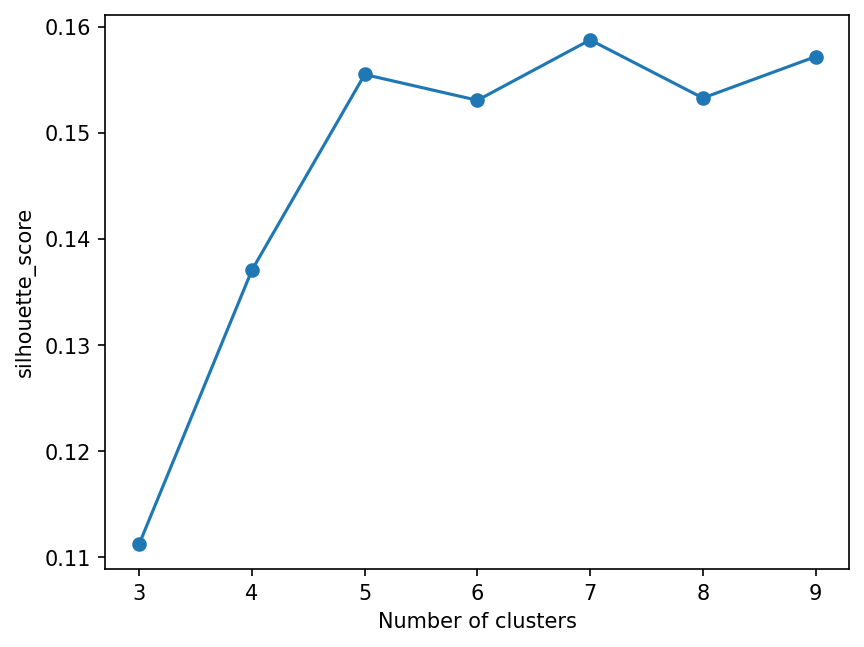

In [77]:
from sklearn import metrics
np.random.seed(0)

scores=[]
matrix=X.values
for n_cluster in range(3, 10):
    # KMeans(init**kmeans++、random、也可以是数组| n_clusters**分几簇| n_init**算法运行几次)
    kmeans=KMeans(init="k-means++", n_clusters=n_cluster, n_init=30)  
    kmeans.fit(matrix)  # 拟合 matrix 到 KMeans 模型
    clusters=kmeans.predict(matrix)
    S_avg = silhouette_score(matrix,clusters)   
    scores.append(metrics.silhouette_score(matrix, kmeans.labels_, metric='euclidean'))
    print("For n_clusters =", n_cluster, "The average silhouette_score is :", S_avg)
print(scores)
plt.figure(dpi=150)
plt.plot(range(3, 10), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()
   

画肘部图——与轮廓系数图对比，帮助找最优簇个数

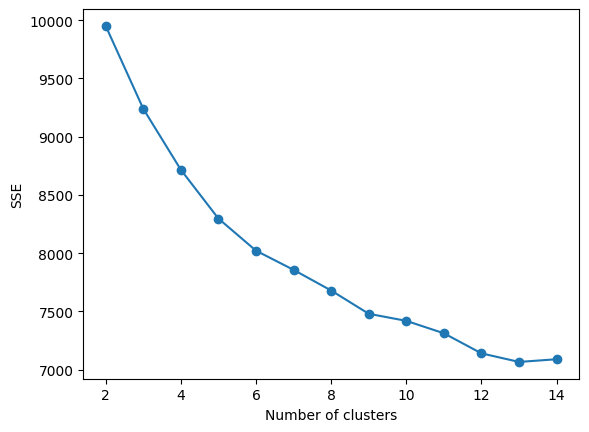

In [78]:
SSE_lst=[]
matrix=X.values
for n_cluster in range(2, 15):
    # KMeans(init**kmeans++、random、也可以是数组| n_clusters**分几簇| n_init**算法运行几次)
    kmeans=KMeans(init="k-means++", n_clusters=n_cluster, n_init=30)  
    kmeans.fit(matrix)  # 拟合 matrix 到 KMeans 模型
    clusters=kmeans.predict(matrix)
    S_avg = silhouette_score(matrix,clusters)   
    SSE_lst.append(kmeans.inertia_)


plt.plot(range(2, 15), SSE_lst, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [79]:
# 在上面已经直观的看出应该聚5类。这里就是只计算聚为5类时的轮廓系数
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.15691683564046496


##### 轮廓系数图看出，簇=5、和簇=6时，对应两个最大的轮廓系数。从肘部图看出，簇=5时图像就已经出现了拐弯。
##### 结合两张图判断，簇=8可能是过拟合，产品分5类应该更加合适。




描述集群的内容

In [80]:
pd.Series(clusters).value_counts()


4    890
2    817
1    676
0    520
3    395
dtype: int64

主成分分析

In [81]:
# 不需要进行数据的缩放，因为所有数据都是0、和1
from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(matrix)
# matrix_std = sc.transform(matrix)
pca = PCA()
# pca.fit(matrix_std)
# pca_samples = pca.transform(matrix_std)
pca.fit(matrix)
pca_samples = pca.transform(matrix)

exp_var_pca_samples = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca_samples)

# 由于经过独热编码，数据全是0和1，所以此时万万不可预处理，因为数据集已经足够规律


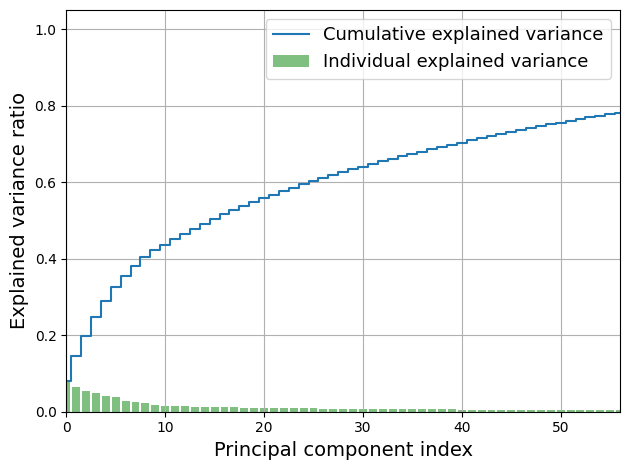

In [82]:
# fig, ax = plt.subplots(figsize=(14, 6))
# sns.set(font_scale=1)
# plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
#          label='cumulative explained variance')
# sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
#             label='individual explained variance')
# plt.xlim(0, 100)
# ax.set_xticklabels([s if int(s.get_text())%4 == 0 else '' for s in ax.get_xticklabels()])
from turtle import color


plt.bar(range(0, len(exp_var_pca_samples)), exp_var_pca_samples, alpha=0.5, color='g', align='center'
        , label='Individual explained variance')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid'
        , label='Cumulative explained variance')
plt.ylabel('Explained variance ratio', fontsize = 14)
plt.xlabel('Principal component index', fontsize = 14)
plt.xlim(0, 56)
plt.grid()
plt.legend(loc='best', fontsize = 13)
plt.tight_layout()
plt.show()

In [83]:
pca = PCA(n_components=56)
matrix_9D = pca.fit_transform(matrix)
mat = pd.DataFrame(matrix_9D)
mat['cluster'] = pd.Series(clusters)

mat

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,cluster
0,-0.693600,-0.500879,-0.407113,-0.007784,-0.134421,-0.092833,-0.814902,0.480642,0.927946,0.377066,...,0.018840,0.014591,-0.043990,-0.064417,-0.056213,0.015198,-0.013320,-0.075892,0.073155,2
1,-0.693600,-0.500879,-0.407113,-0.007784,-0.134421,-0.092833,-0.814902,0.480642,0.927946,0.377066,...,0.018840,0.014591,-0.043990,-0.064417,-0.056213,0.015198,-0.013320,-0.075892,0.073155,2
2,-0.672910,-0.489750,-0.259091,-0.055608,-0.070656,-0.001845,-0.218101,-0.063510,-0.096060,0.270290,...,-0.012986,0.013484,-0.014252,-0.061607,-0.062771,0.051556,0.014999,-0.099258,0.067636,2
3,-0.694524,-0.504273,-0.412229,-0.014746,-0.140325,-0.101888,-0.815136,0.506429,0.939777,0.367179,...,0.091662,0.076694,-0.018153,-0.064669,-0.088154,-0.031725,-0.039347,-0.105804,0.149314,2
4,-0.076957,0.475263,0.373720,-0.651379,-0.292790,-0.128723,-0.116957,-0.011140,0.001637,-0.058677,...,-0.036607,-0.020722,0.021080,0.037511,0.002347,0.022163,0.024524,-0.035873,-0.026191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,-0.643369,-0.560275,-0.190973,-0.101528,-0.022367,-0.080370,-0.104272,-0.125885,-0.176054,-0.157783,...,0.283056,-0.426326,0.017167,0.016063,0.055998,-0.135933,0.118428,-0.002758,0.009286,2
3294,-0.151908,0.574838,-0.513810,0.439671,-0.242630,-0.236034,0.724663,0.573738,-0.076816,-0.174148,...,0.215797,-0.126707,0.068370,-0.093648,-0.065088,-0.007199,0.049012,0.131833,-0.022494,1
3295,-0.093356,0.557774,0.300804,-0.687818,-0.349693,-0.261505,-0.179752,-0.098281,-0.350514,0.620739,...,-0.038387,0.015927,-0.163481,0.002816,-0.000400,0.260734,0.093684,0.049176,0.213129,0
3296,-0.171332,0.450735,0.750659,1.460816,-0.349048,-0.168711,0.696196,-0.925998,0.796770,0.228210,...,-0.101216,0.206949,-0.247587,0.045003,0.019188,0.392570,0.062235,0.140288,-0.301290,1


In [84]:
mat.cluster.max()

4

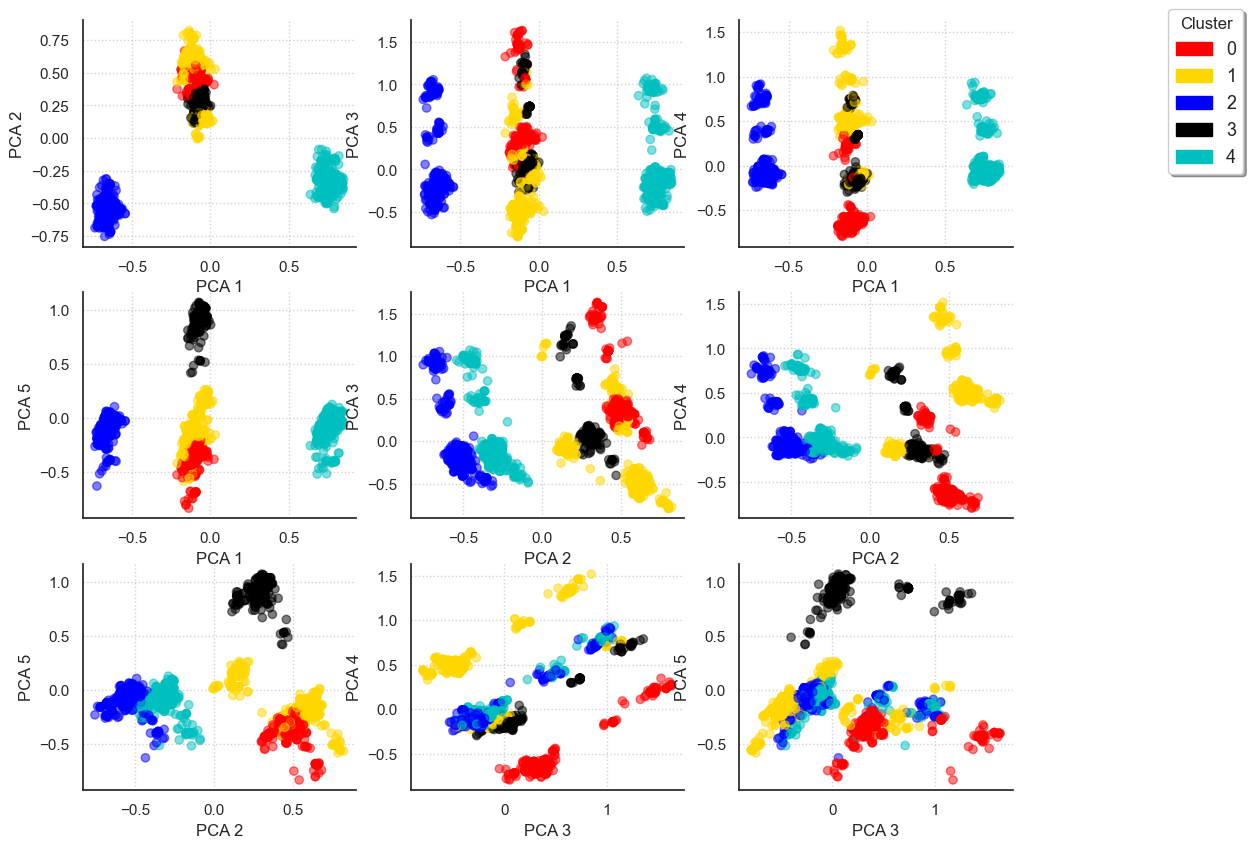

In [85]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'g', 6:'malignant', 7:'yellow', 8:'blue'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(4):
    for iy in range(ix+1, 5):   
        increment += 1
        ax = fig.add_subplot(3,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 9: break
    if increment == 9: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', 
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure) #facecolor = 'lightgrey',

# plt.tight_layout()

## 客户类别

### 格式化数据

In [86]:
# clusters是根据一行行的matrix逐行predict出来的。
# clusters的每一行对应matrix的每一行

Description_cluster_dict = {}

Description_cluster_ZIP = zip(liste_produits, clusters)

for key, value in Description_cluster_ZIP:    # liste_produits = df_cleaned.Description.unique()
    Description_cluster_dict[key]=value

df_cleaned['categ_product'] = df_cleaned.loc[:, 'Description'].map(Description_cluster_dict)    # 起到 join 的效果
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,取消订单数量,TotalPrice,categ_product
19,559519,22662,LUNCH BAG DOLLY GIRL DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0,217.50,2
20,559519,22383,LUNCH BAG SUKI DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0,217.50,2
21,559519,20728,LUNCH BAG CARS BLUE,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0,217.50,2
22,559519,22382,LUNCH BAG SPACEBOY DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0,217.50,2
98,559523,23164,REGENCY CAKE SLICE,1,2011-07-08 17:19:00,4.95,13955.0,United Kingdom,0,4.95,0
...,...,...,...,...,...,...,...,...,...,...,...
284704,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0,10.20,4
284705,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0,12.60,1
284706,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60,0
284707,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60,0


#### 分组的产品
##### 手动进行类似 One-Hot Encoding 的操作 

In [87]:
# df_cleaned.reset_index(inplace=True)
# df_cleaned.sort_values(by=['categ_product'], ascending=True, inplace=True)
# df_cleaned

In [88]:
# df_cleaned.drop(['level_0'], axis=1, inplace=True)
# df_cleaned.reset_index(inplace=True)
# df_cleaned

In [89]:
# df_cleaned.drop(['level_0'], axis=1, inplace=True)

In [90]:
# df_cleaned.reset_index(inplace=True)

In [91]:
# df_cleaned

In [92]:
# for i in range(5):
#     lst=[]
#     col_nm='categ_{}'.format(i)
#     for j in range(len(df_cleaned.categ_product)):
#         if df_cleaned.categ_product[j] == i:
#             lst.append(df_cleaned.UnitPrice[j] * (df_cleaned.Quantity[j] - df_cleaned['取消订单数量'][j]))
#         if df_cleaned.categ_product[j] != i:
#             lst.append(0.00)
#     df_cleaned[col_nm]=pd.Series(lst)
#     lst.clear()        
# df_cleaned


//不理解//

In [93]:
for i in range(5):
    col = 'categ_{}'.format(i)        
    df_temp = df_cleaned[df_cleaned['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['取消订单数量'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace = True)


df_cleaned[['InvoiceNo', 'Description', 'categ_product', 
            'categ_0', 'categ_1', 'categ_2', 
            'categ_3','categ_4']][:10]

,InvoiceNo,Description,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
19,559519,LUNCH BAG DOLLY GIRL DESIGN,2,0.00,0.00,217.50,0.0,0.00
20,559519,LUNCH BAG SUKI DESIGN,2,0.00,0.00,217.50,0.0,0.00
21,559519,LUNCH BAG CARS BLUE,2,0.00,0.00,217.50,0.0,0.00
22,559519,LUNCH BAG SPACEBOY DESIGN,2,0.00,0.00,217.50,0.0,0.00
98,559523,REGENCY CAKE SLICE,0,4.95,0.00,0.00,0.0,0.00
99,559523,CAKE STAND 3 TIER MAGIC GARDEN,1,0.00,12.75,0.00,0.0,0.00
100,559523,SET OF 3 HEART COOKIE CUTTERS,2,0.00,0.00,1.25,0.0,0.00
101,559523,72 SWEETHEART FAIRY CAKE CASES,4,0.00,0.00,0.00,0.0,0.55
102,559523,TOAST ITS - I LOVE YOU,2,0.00,0.00,1.25,0.0,0.00
103,559523,RED FLOCK LOVE HEART PHOTO FRAME,4,0.00,0.00,0.00,0.0,0.78


接下来按照单个订单聚合，将一个订单中所有产品聚合到一条记录中，并记为购物车价格，代表某个特定订单中所有产品的总价。因此，创建了一个新的数据表，其中包含每个订单的购物车价格，以及它在5类产品中分布的方式。

//不理解//

In [94]:
# 购买金额/用户及订单
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'购物车价格'})

# 订单/产品类别价格的百分比
for i in range(5):
    col = 'categ_{}'.format(i) 
    temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False).sum()[col]
    basket_price.loc[:, col] = temp 

# 订单日期
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

# 选择一些重要的数据
basket_price = basket_price[basket_price['购物车价格'] > 0]
basket_price.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,InvoiceNo,购物车价格,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
0,12347.0,562032,584.91,158.16,157.95,109.70,97.8,61.30,2011-08-02 08:48:00
1,12347.0,573511,1294.32,368.72,512.40,203.30,55.6,154.30,2011-10-31 12:25:00
2,12347.0,581180,224.82,30.00,55.44,80.40,0.0,58.98,2011-12-07 15:52:00
3,12348.0,568172,310.00,0.00,40.00,270.00,0.0,0.00,2011-09-25 13:13:00
4,12349.0,577609,1757.55,191.15,648.02,465.86,373.2,79.32,2011-11-21 09:51:00


In [95]:

basket_price.head(20)

,CustomerID,InvoiceNo,购物车价格,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
0,12347.0,562032,584.91,158.16,157.95,109.70,97.80,61.30,2011-08-02 08:48:00.000000000
1,12347.0,573511,1294.32,368.72,512.40,203.30,55.60,154.30,2011-10-31 12:25:00.000000000
2,12347.0,581180,224.82,30.00,55.44,80.40,0.00,58.98,2011-12-07 15:52:00.000000000
3,12348.0,568172,310.00,0.00,40.00,270.00,0.00,0.00,2011-09-25 13:13:00.000000000
4,12349.0,577609,1757.55,191.15,648.02,465.86,373.20,79.32,2011-11-21 09:51:00.000000000
5,12352.0,567505,366.25,98.65,122.30,82.10,63.20,0.00,2011-09-20 14:34:00.000000000
6,12352.0,568699,266.25,114.30,40.00,19.80,92.15,0.00,2011-09-28 14:58:00.000000000
7,12352.0,574275,311.73,37.25,92.48,107.30,53.90,20.80,2011-11-03 14:36:59.999999744
8,12356.0,576895,58.35,0.00,58.35,0.00,0.00,0.00,2011-11-17 08:40:00.000000000
9,12357.0,574740,6207.67,1672.46,1485.30,1154.70,1563.65,331.56,2011-11-06 16:07:00.000000000


In [96]:
print(basket_price['InvoiceDate'].min(), '->',  basket_price['InvoiceDate'].max())

2011-07-08 16:17:00 -> 2011-12-09 12:50:00


In [97]:
len(basket_price)

9318

In [98]:
df_basket_price=basket_price.reset_index(drop=True)
df_basket_price

,CustomerID,InvoiceNo,购物车价格,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
0,12347.0,562032,584.91,158.16,157.95,109.70,97.8,61.30,2011-08-02 08:48:00
1,12347.0,573511,1294.32,368.72,512.40,203.30,55.6,154.30,2011-10-31 12:25:00
2,12347.0,581180,224.82,30.00,55.44,80.40,0.0,58.98,2011-12-07 15:52:00
3,12348.0,568172,310.00,0.00,40.00,270.00,0.0,0.00,2011-09-25 13:13:00
4,12349.0,577609,1757.55,191.15,648.02,465.86,373.2,79.32,2011-11-21 09:51:00
...,...,...,...,...,...,...,...,...,...
9313,18283.0,578262,307.05,0.00,152.89,86.12,0.0,68.04,2011-11-23 13:27:00
9314,18283.0,579673,220.31,9.75,114.01,66.90,0.0,29.65,2011-11-30 12:59:00
9315,18283.0,580872,208.00,0.00,119.03,61.90,0.0,27.07,2011-12-06 12:02:00
9316,18287.0,570715,1001.32,32.00,326.04,386.44,0.0,256.84,2011-10-12 10:23:00


In [99]:
df_basket_price.sort_values(by=['InvoiceDate'], ascending=True, inplace=True)
df_basket_price

,CustomerID,InvoiceNo,购物车价格,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
7818,17353.0,559519,870.00,0.00,0.00,870.00,0.00,0.00,2011-07-08 16:17:00
2562,13955.0,559523,117.86,23.35,41.85,28.50,19.90,4.26,2011-07-08 17:19:00
7155,16866.0,559524,45.00,45.00,0.00,0.00,0.00,0.00,2011-07-10 10:14:00
7242,16923.0,559525,383.15,35.55,167.36,119.95,48.20,12.09,2011-07-10 10:30:00
5516,15756.0,559526,115.72,18.80,19.27,33.85,28.20,15.60,2011-07-10 11:19:00
...,...,...,...,...,...,...,...,...,...
2308,13777.0,581583,124.60,0.00,66.60,58.00,0.00,0.00,2011-12-09 12:23:00
2309,13777.0,581584,140.64,0.00,88.80,0.00,0.00,51.84,2011-12-09 12:25:00
5581,15804.0,581585,329.05,77.00,24.96,108.52,17.85,100.72,2011-12-09 12:31:00
1365,13113.0,581586,339.20,0.00,0.00,30.00,309.20,0.00,2011-12-09 12:49:00


In [100]:
df_basket_price.reset_index(drop=True, inplace=True)
df_basket_price

,CustomerID,InvoiceNo,购物车价格,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
0,17353.0,559519,870.00,0.00,0.00,870.00,0.00,0.00,2011-07-08 16:17:00
1,13955.0,559523,117.86,23.35,41.85,28.50,19.90,4.26,2011-07-08 17:19:00
2,16866.0,559524,45.00,45.00,0.00,0.00,0.00,0.00,2011-07-10 10:14:00
3,16923.0,559525,383.15,35.55,167.36,119.95,48.20,12.09,2011-07-10 10:30:00
4,15756.0,559526,115.72,18.80,19.27,33.85,28.20,15.60,2011-07-10 11:19:00
...,...,...,...,...,...,...,...,...,...
9313,13777.0,581583,124.60,0.00,66.60,58.00,0.00,0.00,2011-12-09 12:23:00
9314,13777.0,581584,140.64,0.00,88.80,0.00,0.00,51.84,2011-12-09 12:25:00
9315,15804.0,581585,329.05,77.00,24.96,108.52,17.85,100.72,2011-12-09 12:31:00
9316,13113.0,581586,339.20,0.00,0.00,30.00,309.20,0.00,2011-12-09 12:49:00


In [101]:
df_basket_price['InvoiceDate'] = df_basket_price['InvoiceDate'].map(lambda x:x.to_pydatetime().date())

set_entrainement=df_basket_price.iloc[0:5590, :]
set_validation=df_basket_price.iloc[5590:7454]
set_test=df_basket_price.iloc[7454:9319, :]

cp_basket_price=set_entrainement

In [102]:
set_entrainement

,CustomerID,InvoiceNo,购物车价格,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
0,17353.0,559519,870.00,0.00,0.00,870.00,0.00,0.00,2011-07-08
1,13955.0,559523,117.86,23.35,41.85,28.50,19.90,4.26,2011-07-08
2,16866.0,559524,45.00,45.00,0.00,0.00,0.00,0.00,2011-07-10
3,16923.0,559525,383.15,35.55,167.36,119.95,48.20,12.09,2011-07-10
4,15756.0,559526,115.72,18.80,19.27,33.85,28.20,15.60,2011-07-10
...,...,...,...,...,...,...,...,...,...
5585,12610.0,572934,160.00,0.00,160.00,0.00,0.00,0.00,2011-10-27
5586,14189.0,572935,466.65,82.50,73.50,139.02,34.00,137.63,2011-10-27
5587,13988.0,572946,482.90,73.90,71.00,201.23,110.25,26.52,2011-10-27
5588,18154.0,572960,220.49,0.00,50.89,63.00,25.00,81.60,2011-10-27


In [103]:
set_test

,CustomerID,InvoiceNo,购物车价格,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
7454,17324.0,577217,243.61,11.45,95.77,64.84,6.95,64.60,2011-11-18
7455,13117.0,577218,143.14,49.30,0.00,24.48,0.00,69.36,2011-11-18
7456,12391.0,577228,439.66,115.45,113.35,145.55,21.85,43.46,2011-11-18
7457,18034.0,577230,158.53,22.90,21.31,21.30,6.95,86.07,2011-11-18
7458,14367.0,577235,314.85,29.85,157.20,102.30,0.00,25.50,2011-11-18
...,...,...,...,...,...,...,...,...,...
9313,13777.0,581583,124.60,0.00,66.60,58.00,0.00,0.00,2011-12-09
9314,13777.0,581584,140.64,0.00,88.80,0.00,0.00,51.84,2011-12-09
9315,15804.0,581585,329.05,77.00,24.96,108.52,17.85,100.72,2011-12-09
9316,13113.0,581586,339.20,0.00,0.00,30.00,309.20,0.00,2011-12-09


In [104]:
set_validation

,CustomerID,InvoiceNo,购物车价格,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
5590,13363.0,572969,603.82,57.30,227.18,167.04,42.70,109.60,2011-10-27
5591,12681.0,572986,490.19,37.20,67.50,205.20,90.65,89.64,2011-10-27
5592,18276.0,572990,329.61,32.70,149.16,110.20,6.25,31.30,2011-10-27
5593,12681.0,572992,121.92,0.00,121.92,0.00,0.00,0.00,2011-10-27
5594,17684.0,572994,239.41,41.35,49.80,96.60,16.50,35.16,2011-10-27
...,...,...,...,...,...,...,...,...,...
7449,18061.0,577179,92.40,59.40,0.00,0.00,33.00,0.00,2011-11-18
7450,12380.0,577180,1040.39,192.47,619.22,123.90,104.80,0.00,2011-11-18
7451,16945.0,577182,304.70,51.70,208.00,15.00,0.00,30.00,2011-11-18
7452,12989.0,577202,293.76,81.36,0.00,0.00,212.40,0.00,2011-11-18


In [105]:
transactions_per_user=cp_basket_price.groupby(
    by=['CustomerID'])['购物车价格'].agg(['count','min','max','mean','sum'])

In [106]:
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = cp_basket_price.groupby(by=['CustomerID'])[col].sum() / \
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
cp_basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347.0,1,584.91,584.91,584.91,584.91,27.040057,27.004154,18.755022,16.720521,10.480245
1,12348.0,1,310.00,310.00,310.00,310.00,0.000000,12.903226,87.096774,0.000000,0.000000
2,12352.0,2,266.25,366.25,316.25,632.50,33.667984,25.660079,16.110672,24.561265,0.000000
3,12358.0,1,484.86,484.86,484.86,484.86,3.093677,20.150146,10.469001,66.287176,0.000000
4,12359.0,1,2680.55,2680.55,2680.55,2680.55,23.786163,43.477271,11.819962,20.540561,0.376042


In [107]:
cp_basket_price.groupby(by=['CustomerID'])['categ_0'].sum()

CustomerID
12347.0    158.16
12348.0      0.00
12352.0    212.95
12358.0     15.00
12359.0    637.60
            ...  
18277.0      0.00
18278.0    111.20
18282.0     13.50
18283.0     16.60
18287.0     32.00
Name: categ_0, Length: 2589, dtype: float64

//不理解//

In [108]:
last_date = cp_basket_price['InvoiceDate'].max()

first_registration = pd.DataFrame(cp_basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase      = pd.DataFrame(cp_basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

test  = first_registration.applymap(lambda x:(last_date - x).days)
test2 = last_purchase.applymap(lambda x:(last_date - x).days)

transactions_per_user.loc[:, '最后一次购买'] = test2.reset_index(drop = False)['InvoiceDate']
transactions_per_user.loc[:, '第一次购买'] = test.reset_index(drop = False)['InvoiceDate']

transactions_per_user[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,最后一次购买,第一次购买
0,12347.0,1,584.91,584.91,584.91,584.91,27.040057,27.004154,18.755022,16.720521,10.480245,86,86
1,12348.0,1,310.00,310.00,310.00,310.00,0.000000,12.903226,87.096774,0.000000,0.000000,32,32
2,12352.0,2,266.25,366.25,316.25,632.50,33.667984,25.660079,16.110672,24.561265,0.000000,29,37
3,12358.0,1,484.86,484.86,484.86,484.86,3.093677,20.150146,10.469001,66.287176,0.000000,107,107
4,12359.0,1,2680.55,2680.55,2680.55,2680.55,23.786163,43.477271,11.819962,20.540561,0.376042,14,14


In [109]:
n1 = transactions_per_user[transactions_per_user['count'] == 1].shape[0]
n2 = transactions_per_user.shape[0]
print("仅购买一次的客户的数量: {:<2}/{:<5} ({:<2.2f}%)".format(n1,n2,n1/n2*100))

仅购买一次的客户的数量: 1412/2589  (54.54%)


In [110]:
transactions_per_user['count'].value_counts()

1     1412
2      611
3      232
4      131
5       62
6       45
7       30
8       13
9       11
10      10
11       7
12       3
14       3
24       2
13       2
23       2
16       2
26       2
20       1
75       1
21       1
45       1
17       1
15       1
19       1
43       1
29       1
Name: count, dtype: int64

In [111]:
cp_test=set_test

In [112]:
test_transactions_per_user=cp_test.groupby(
    by=['CustomerID'])['购物车价格'].agg(['count','min','max','mean','sum'])

for i in range(5):
    col = 'categ_{}'.format(i)
    test_transactions_per_user.loc[:,col] = cp_test.groupby(by=['CustomerID'])[col].sum() / \
                                            test_transactions_per_user['sum']*100

test_transactions_per_user.reset_index(drop = False, inplace = True)
cp_test.groupby(by=['CustomerID'])['categ_0'].sum()
test_transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347.0,1,224.82,224.82,224.82,224.82,13.344009,24.659728,35.761943,0.000000,26.234321
1,12349.0,1,1757.55,1757.55,1757.55,1757.55,10.875935,36.870644,26.506216,21.234104,4.513101
2,12358.0,1,683.20,683.20,683.20,683.20,0.000000,23.419204,3.425059,73.155738,0.000000
3,12362.0,1,529.04,529.04,529.04,529.04,35.120218,36.556782,15.896719,6.010888,6.415394
4,12364.0,1,310.32,310.32,310.32,310.32,5.703790,4.833720,23.975251,0.000000,65.487239


In [113]:
last_date = cp_test['InvoiceDate'].max()

first_registration = pd.DataFrame(cp_test.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase      = pd.DataFrame(cp_test.groupby(by=['CustomerID'])['InvoiceDate'].max())

test  = first_registration.applymap(lambda x:(last_date - x).days)
test2 = last_purchase.applymap(lambda x:(last_date - x).days)

test_transactions_per_user.loc[:, '最后一次购买'] = test2.reset_index(drop = False)['InvoiceDate']
test_transactions_per_user.loc[:, '第一次购买'] = test.reset_index(drop = False)['InvoiceDate']

test_transactions_per_user[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,最后一次购买,第一次购买
0,12347.0,1,224.82,224.82,224.82,224.82,13.344009,24.659728,35.761943,0.000000,26.234321,2,2
1,12349.0,1,1757.55,1757.55,1757.55,1757.55,10.875935,36.870644,26.506216,21.234104,4.513101,18,18
2,12358.0,1,683.20,683.20,683.20,683.20,0.000000,23.419204,3.425059,73.155738,0.000000,1,1
3,12362.0,1,529.04,529.04,529.04,529.04,35.120218,36.556782,15.896719,6.010888,6.415394,3,3
4,12364.0,1,310.32,310.32,310.32,310.32,5.703790,4.833720,23.975251,0.000000,65.487239,7,7


In [114]:
n1 = test_transactions_per_user[test_transactions_per_user['count'] == 1].shape[0]
n2 = test_transactions_per_user.shape[0]
print("仅购买一次的客户的数量: {:<2}/{:<5} ({:<2.2f}%)".format(n1,n2,n1/n2*100))

仅购买一次的客户的数量: 910/1247  (72.98%)


In [115]:
cp_validation=set_validation

In [116]:
validation_transactions_per_user=cp_validation.groupby(
    by=['CustomerID'])['购物车价格'].agg(['count','min','max','mean','sum'])

for i in range(5):
    col = 'categ_{}'.format(i)
    validation_transactions_per_user.loc[:,col] = cp_validation.groupby(by=['CustomerID'])[col].sum() / \
                                            validation_transactions_per_user['sum']*100

validation_transactions_per_user.reset_index(drop = False, inplace = True)
cp_test.groupby(by=['CustomerID'])['categ_0'].sum()
validation_transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347.0,1,1294.32,1294.32,1294.320,1294.32,28.487546,39.588355,15.707089,4.295692,11.921318
1,12352.0,1,311.73,311.73,311.730,311.73,11.949443,29.666699,34.420813,17.290604,6.672441
2,12356.0,1,58.35,58.35,58.350,58.35,0.000000,100.000000,0.000000,0.000000,0.000000
3,12357.0,1,6207.67,6207.67,6207.670,6207.67,26.941832,23.926852,18.601182,25.189000,5.341134
4,12362.0,2,450.31,477.94,464.125,928.25,26.908699,41.626717,10.956100,12.157285,8.351198


In [117]:
last_date = cp_validation['InvoiceDate'].max()

first_registration = pd.DataFrame(cp_validation.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase      = pd.DataFrame(cp_validation.groupby(by=['CustomerID'])['InvoiceDate'].max())

test  = first_registration.applymap(lambda x:(last_date - x).days)
test2 = last_purchase.applymap(lambda x:(last_date - x).days)

validation_transactions_per_user.loc[:, '最后一次购买'] = test2.reset_index(drop = False)['InvoiceDate']
validation_transactions_per_user.loc[:, '第一次购买'] = test.reset_index(drop = False)['InvoiceDate']

validation_transactions_per_user[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,最后一次购买,第一次购买
0,12347.0,1,1294.32,1294.32,1294.320,1294.32,28.487546,39.588355,15.707089,4.295692,11.921318,18,18
1,12352.0,1,311.73,311.73,311.730,311.73,11.949443,29.666699,34.420813,17.290604,6.672441,15,15
2,12356.0,1,58.35,58.35,58.350,58.35,0.000000,100.000000,0.000000,0.000000,0.000000,1,1
3,12357.0,1,6207.67,6207.67,6207.670,6207.67,26.941832,23.926852,18.601182,25.189000,5.341134,12,12
4,12362.0,2,450.31,477.94,464.125,928.25,26.908699,41.626717,10.956100,12.157285,8.351198,14,21


In [118]:
n1 = validation_transactions_per_user[validation_transactions_per_user['count'] == 1].shape[0]
n2 = validation_transactions_per_user.shape[0]
print("仅购买一次的客户的数量: {:<2}/{:<5} ({:<2.2f}%)".format(n1,n2,n1/n2*100))

仅购买一次的客户的数量: 1017/1344  (75.67%)


我这里的训练集数据是到11月18日，作者的训练集数据是到9月30日，
在我的训练集里（i.e., 到11月18日为止），有1445人只消费过一次，仅购买一次的客户的数量 (48.02%)
；在作者的代码上（i.e., 到9月30日为止），有1227人只消费过一次，仅购买一次的客户的数量 (59.62%)
；在我的测试集里（i.e., 11月19日~12月9日），有910人只消费过一次，仅购买一次的客户的数量 (72.98%)
。说明，

    1、大多数的消费行为发生在10月、11月
    
    2、11月下旬到来年9月下旬有很大的利润提升空间——大部分消费者只进行了一次购买，因此对消费者客群进行细分是有意义的

---
### 创建客户类别
#### 数据编码 （其实编码已经在上一块完成了，这里实际上在进行PCA的预处理）

In [119]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Normalizer

In [120]:
col_to_use = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']

matrix_train = transactions_per_user[col_to_use].values
matrix_test = test_transactions_per_user[col_to_use].values
matrix_validation = validation_transactions_per_user[col_to_use].values

In [124]:
matrix_train

array([[1.00000000e+00, 5.84910000e+02, 5.84910000e+02, ...,
        1.87550221e+01, 1.67205211e+01, 1.04802448e+01],
       [1.00000000e+00, 3.10000000e+02, 3.10000000e+02, ...,
        8.70967742e+01, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.66250000e+02, 3.66250000e+02, ...,
        1.61106719e+01, 2.45612648e+01, 0.00000000e+00],
       ...,
       [1.00000000e+00, 9.87600000e+01, 9.87600000e+01, ...,
        2.32381531e+01, 0.00000000e+00, 1.93499392e+01],
       [3.00000000e+00, 2.50000000e+00, 1.37390000e+02, ...,
        3.82655846e+01, 0.00000000e+00, 2.17365989e+01],
       [1.00000000e+00, 1.00132000e+03, 1.00132000e+03, ...,
        3.85930572e+01, 0.00000000e+00, 2.56501418e+01]])

In [125]:
sc=StandardScaler()
# sc = MinMaxScaler()
# sc=RobustScaler()
# sc=Normalizer()
sc.fit(matrix_train)
matrix_train_std = sc.transform(matrix_train)
# matrix_test_std = sc.transform(matrix_test)
# matrix_validation_std = sc.transform(matrix_validation)

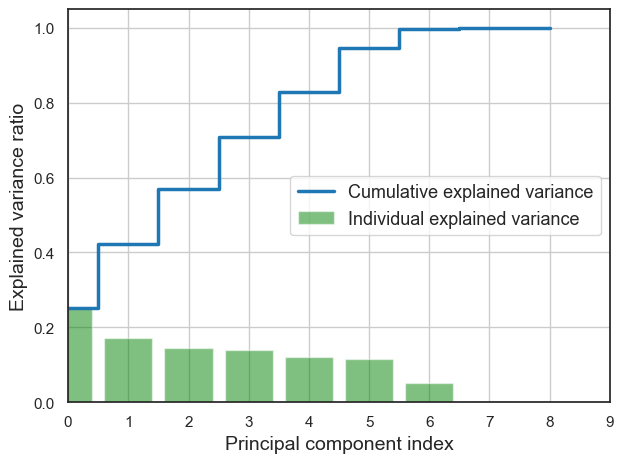

In [126]:
pca=PCA()
matrix_train_pca = pca.fit_transform(matrix_train_std)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, color='g', align='center'
        , label='Individual explained variance')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid'
        , label='Cumulative explained variance')
plt.ylabel('Explained variance ratio', fontsize = 14)
plt.xlabel('Principal component index', fontsize = 14)
plt.xlim(0, 9)
plt.grid()

plt.legend(loc='best', fontsize = 13)
plt.tight_layout()
plt.show()

# SCOutput：6个维度就能解释90%以上的信息了
# MMOutput：4个维度就能解释90%以上的信息了 
# RBOutput：4个维度就能解释90%以上的信息了 
# NOutput：4个维度就能解释90%以上的信息了 

KMeans聚类

For n_clusters = 3 The average silhouette_score is : 0.1523576606591717
For n_clusters = 4 The average silhouette_score is : 0.16143278979365255
For n_clusters = 5 The average silhouette_score is : 0.17158942892807805
For n_clusters = 6 The average silhouette_score is : 0.18413842045672765
For n_clusters = 7 The average silhouette_score is : 0.20365396314590242
For n_clusters = 8 The average silhouette_score is : 0.20211469642347699
For n_clusters = 9 The average silhouette_score is : 0.20162972043352362
For n_clusters = 10 The average silhouette_score is : 0.21060747199755211
For n_clusters = 11 The average silhouette_score is : 0.2189763734354781
For n_clusters = 12 The average silhouette_score is : 0.19372586124063396
For n_clusters = 13 The average silhouette_score is : 0.19192590226474876
For n_clusters = 14 The average silhouette_score is : 0.18729412002789847
For n_clusters = 15 The average silhouette_score is : 0.19038500635814118
For n_clusters = 16 The average silhouette_scor

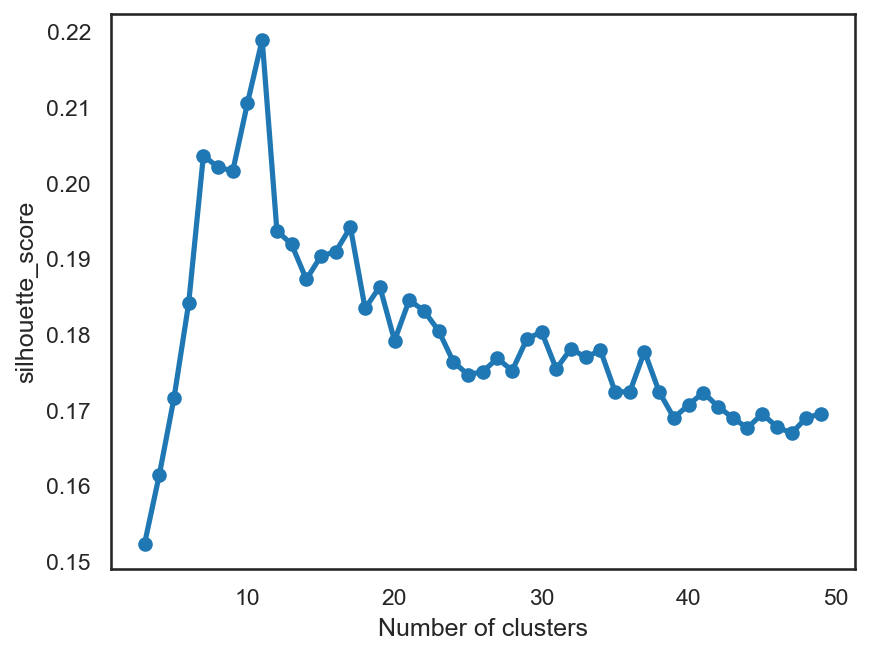

In [127]:
pca=PCA(n_components=6).fit(matrix_train_std)
matrix_train_pca = pca.transform(matrix_train_std)

np.random.seed(0)


scores=[]
for n_cluster in range(3, 50):
    # KMeans(init**kmeans++、random、也可以是数组| n_clusters**分几簇| n_init**算法运行几次)
    kmeans=KMeans(init="k-means++", n_clusters=n_cluster, n_init=30)  
    kmeans.fit(matrix_train_pca)  # 拟合 matrix 到 KMeans 模型
    clusters=kmeans.predict(matrix_train_pca)
    S_avg = silhouette_score(matrix_train_pca,clusters)   
    scores.append(metrics.silhouette_score(matrix_train_pca, kmeans.labels_, metric='euclidean'))
    print("For n_clusters =", n_cluster, "The average silhouette_score is :", S_avg)
print(scores)
plt.figure(dpi=150)
plt.plot(range(3, 50), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

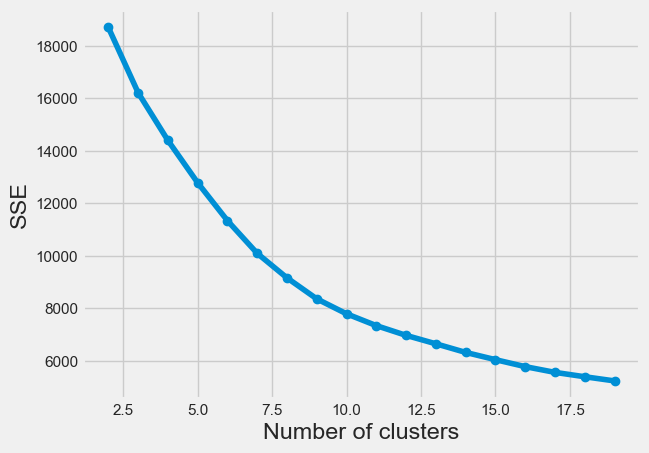

In [288]:
SSE_lst=[]
for n_cluster in range(2, 20):
    kmeans=KMeans(init="k-means++", n_clusters=n_cluster, n_init=30)
    kmeans.fit(matrix_train_pca)
    clusters = kmeans.predict(matrix_train_pca)
    S_avg=silhouette_score(matrix_train_pca, clusters)
    SSE_lst.append(kmeans.inertia_)

plt.plot(range(2, 20), SSE_lst, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [142]:
# import mglearn

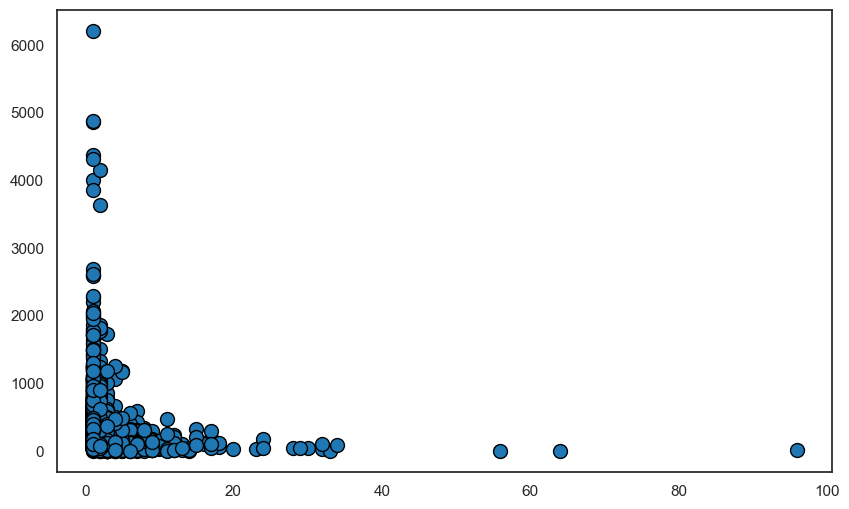

In [151]:
# fig, axes = plt.subplots(1, 1, figsize=(10, 6))
# c1=KMeans(init="k-means++",n_clusters=4,n_init=30)
# c1.fit(matrix_train_validate)
# assignments=kmeans.labels_
# mglearn.discrete_scatter(matrix_train_validate[:, 0], matrix_train_validate[:, 1])

In [296]:
# n_clusters = 11
n_clusters = 10
# n_clusters = 7
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(matrix_train_pca)
clusters_clients = kmeans.predict(matrix_train_pca)
silhouette_avg = silhouette_score(matrix_train_pca, clusters_clients)
print('silhouette score: {:<.3f}'.format(silhouette_avg))

silhouette score: 0.222


In [297]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['客户数量']).T

,5,1,2,7,0,9,4,3,6,8
客户数量,990,370,264,252,235,211,188,52,19,8


In [281]:
pca = PCA(n_components=6)
matrix_3D = pca.fit_transform(matrix_train_std)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)

mat

,0,1,2,3,4,5,cluster
0,0.517513,-0.473706,0.170044,-0.773693,-0.085144,-0.235084,8
1,-0.590132,2.490578,0.097621,0.145744,-2.685513,1.209277,7
2,-0.174557,-1.402900,0.533548,-0.214295,-0.426445,-0.106093,8
3,0.307506,-1.832119,0.626454,-0.700687,0.803917,2.891627,2
4,6.982977,-0.043300,-0.417939,-3.251716,-0.009923,0.208267,5
...,...,...,...,...,...,...,...
2584,-1.057550,-0.224317,0.630362,-0.075249,0.449234,2.167371,2
2585,-0.746521,-0.967326,1.536250,-0.600095,-1.048256,-2.312059,9
2586,-0.963631,0.204675,-1.197851,0.082090,-0.034879,-0.590275,10
2587,-1.089486,0.973068,-0.805233,0.850795,-0.275461,-0.113084,8


KeyError: 3

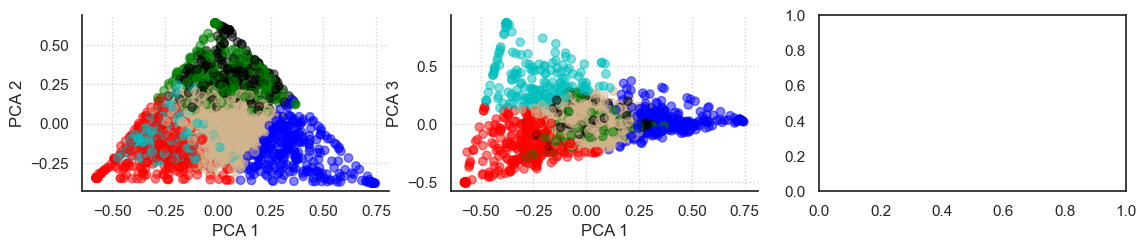

In [225]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan',
                   9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(4):
    for iy in range(ix+1, 4):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', 
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure) #facecolor = 'lightgrey',

plt.tight_layout()

In [298]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    #plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(25, 25)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        
        # 对属于聚类i的样本进行求取轮廓系数，并对其进行排序
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        # color = cm.spectral(float(i) / n_clusters) facecolor=color, edgecolor=color,       
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.8)
        
        # 在轮廓系数图的中间用簇号标记
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
       
        # 为下一个图计算新的y_lower
        y_lower = y_upper + 10  

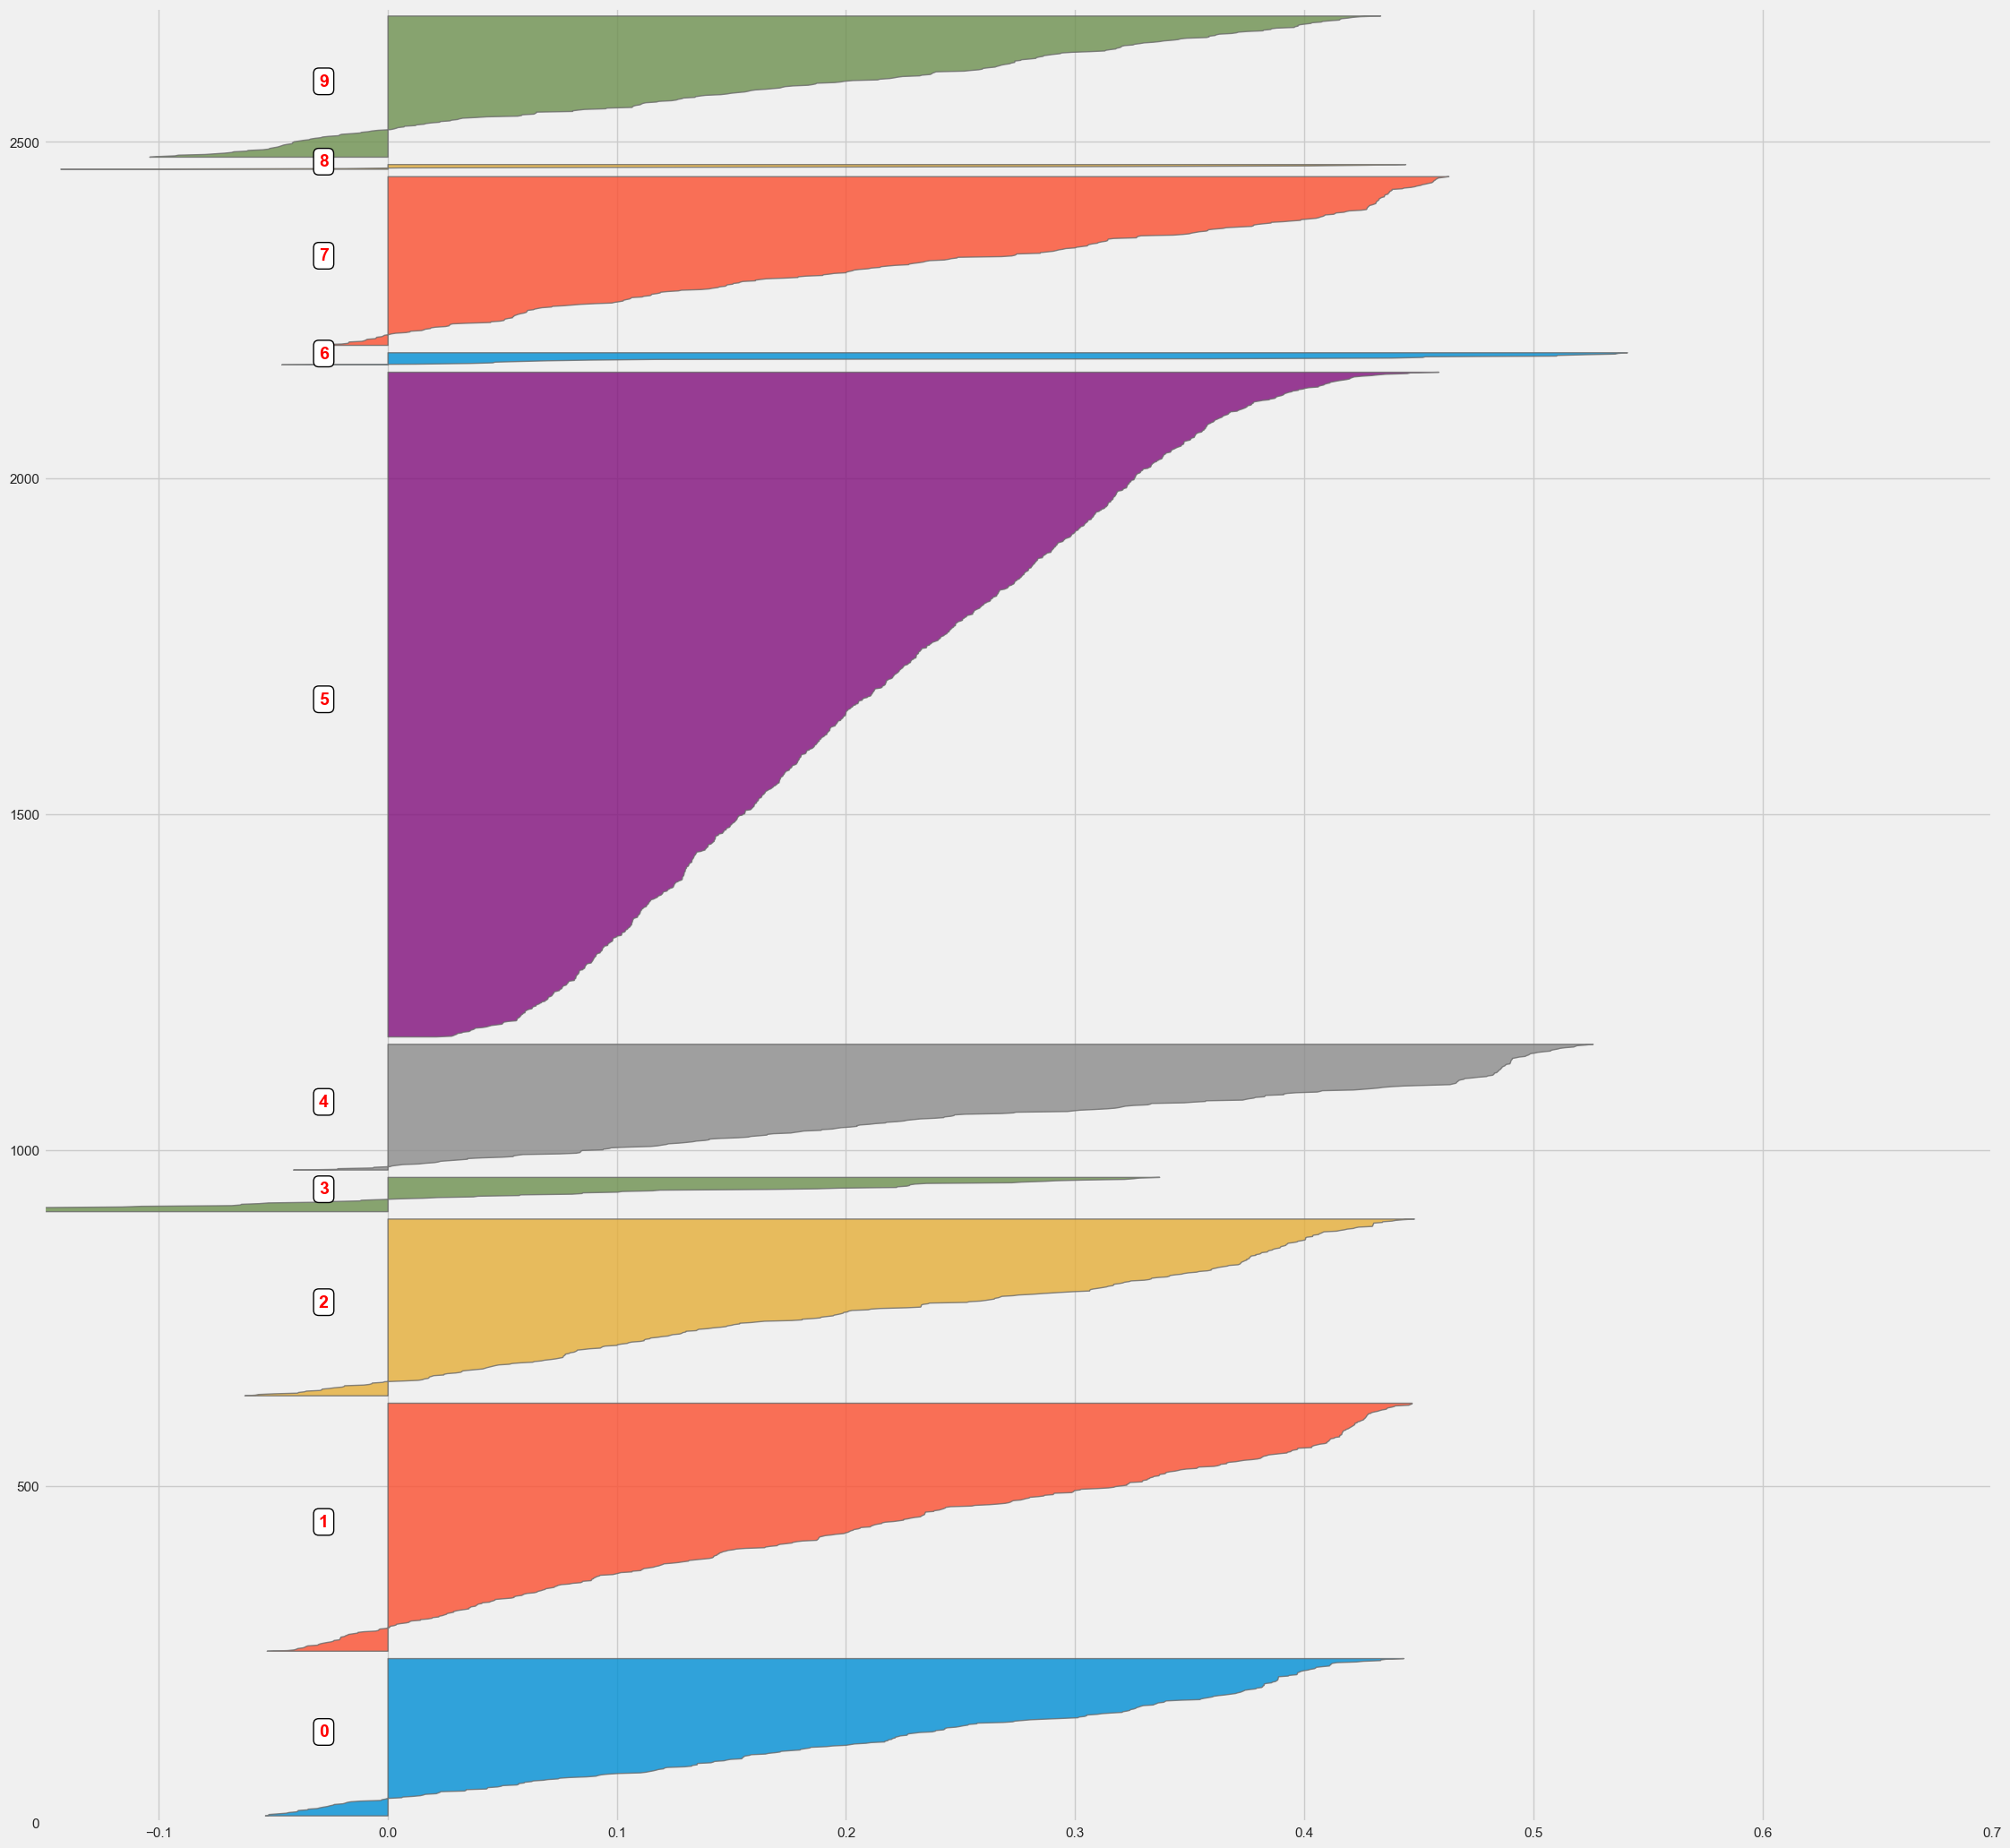

In [299]:
sample_silhouette_values = silhouette_samples(matrix_train_std, clusters_clients)
#____________________________________
# define individual silhouette scores 
sample_silhouette_values = silhouette_samples(matrix_train_std, clusters_clients)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.70], len(matrix_train_std), sample_silhouette_values, 
                           clusters_clients)

经过比较，发现n_clusters取10时，簇的面积相较于n_clusters=11、n_custers=7更加均匀